## Problem Statement
### Business Context
A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

 

### Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

 

### Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary:**
* Booking_ID: the unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
* Not Selected – No meal plan selected
* Meal Plan 1 – Breakfast
* Meal Plan 2 – Half board (breakfast and one other meal)
* Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing the necessary libraries

In [325]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn import tree

## Loading the dataset

In [17]:
df_main = pd.read_csv("INNHotelsGroup.csv")

In [19]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

## Overview of the dataset

### View the first and last 5 rows of the dataset.

In [23]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [25]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [27]:
data.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns.

### Check the data types of the columns for the dataset.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Statistical summary of the data

**Let's check the statistical summary of the data.**

In [35]:
data.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

### Checking for missing values

In [39]:
# checking for null values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### Dropping the duplicate values

* There are no null values in the dataset

In [66]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no duplicate values in the data.

#### Dropping the columns with all unique values

In [70]:
data.Booking_ID.nunique()

36275

* The `Booking_ID` column contains only unique values, so we can drop it

In [77]:
data = data.drop(["Booking_ID"], axis=1)

## Exploratory Data Analysis

In [57]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [59]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [61]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [63]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

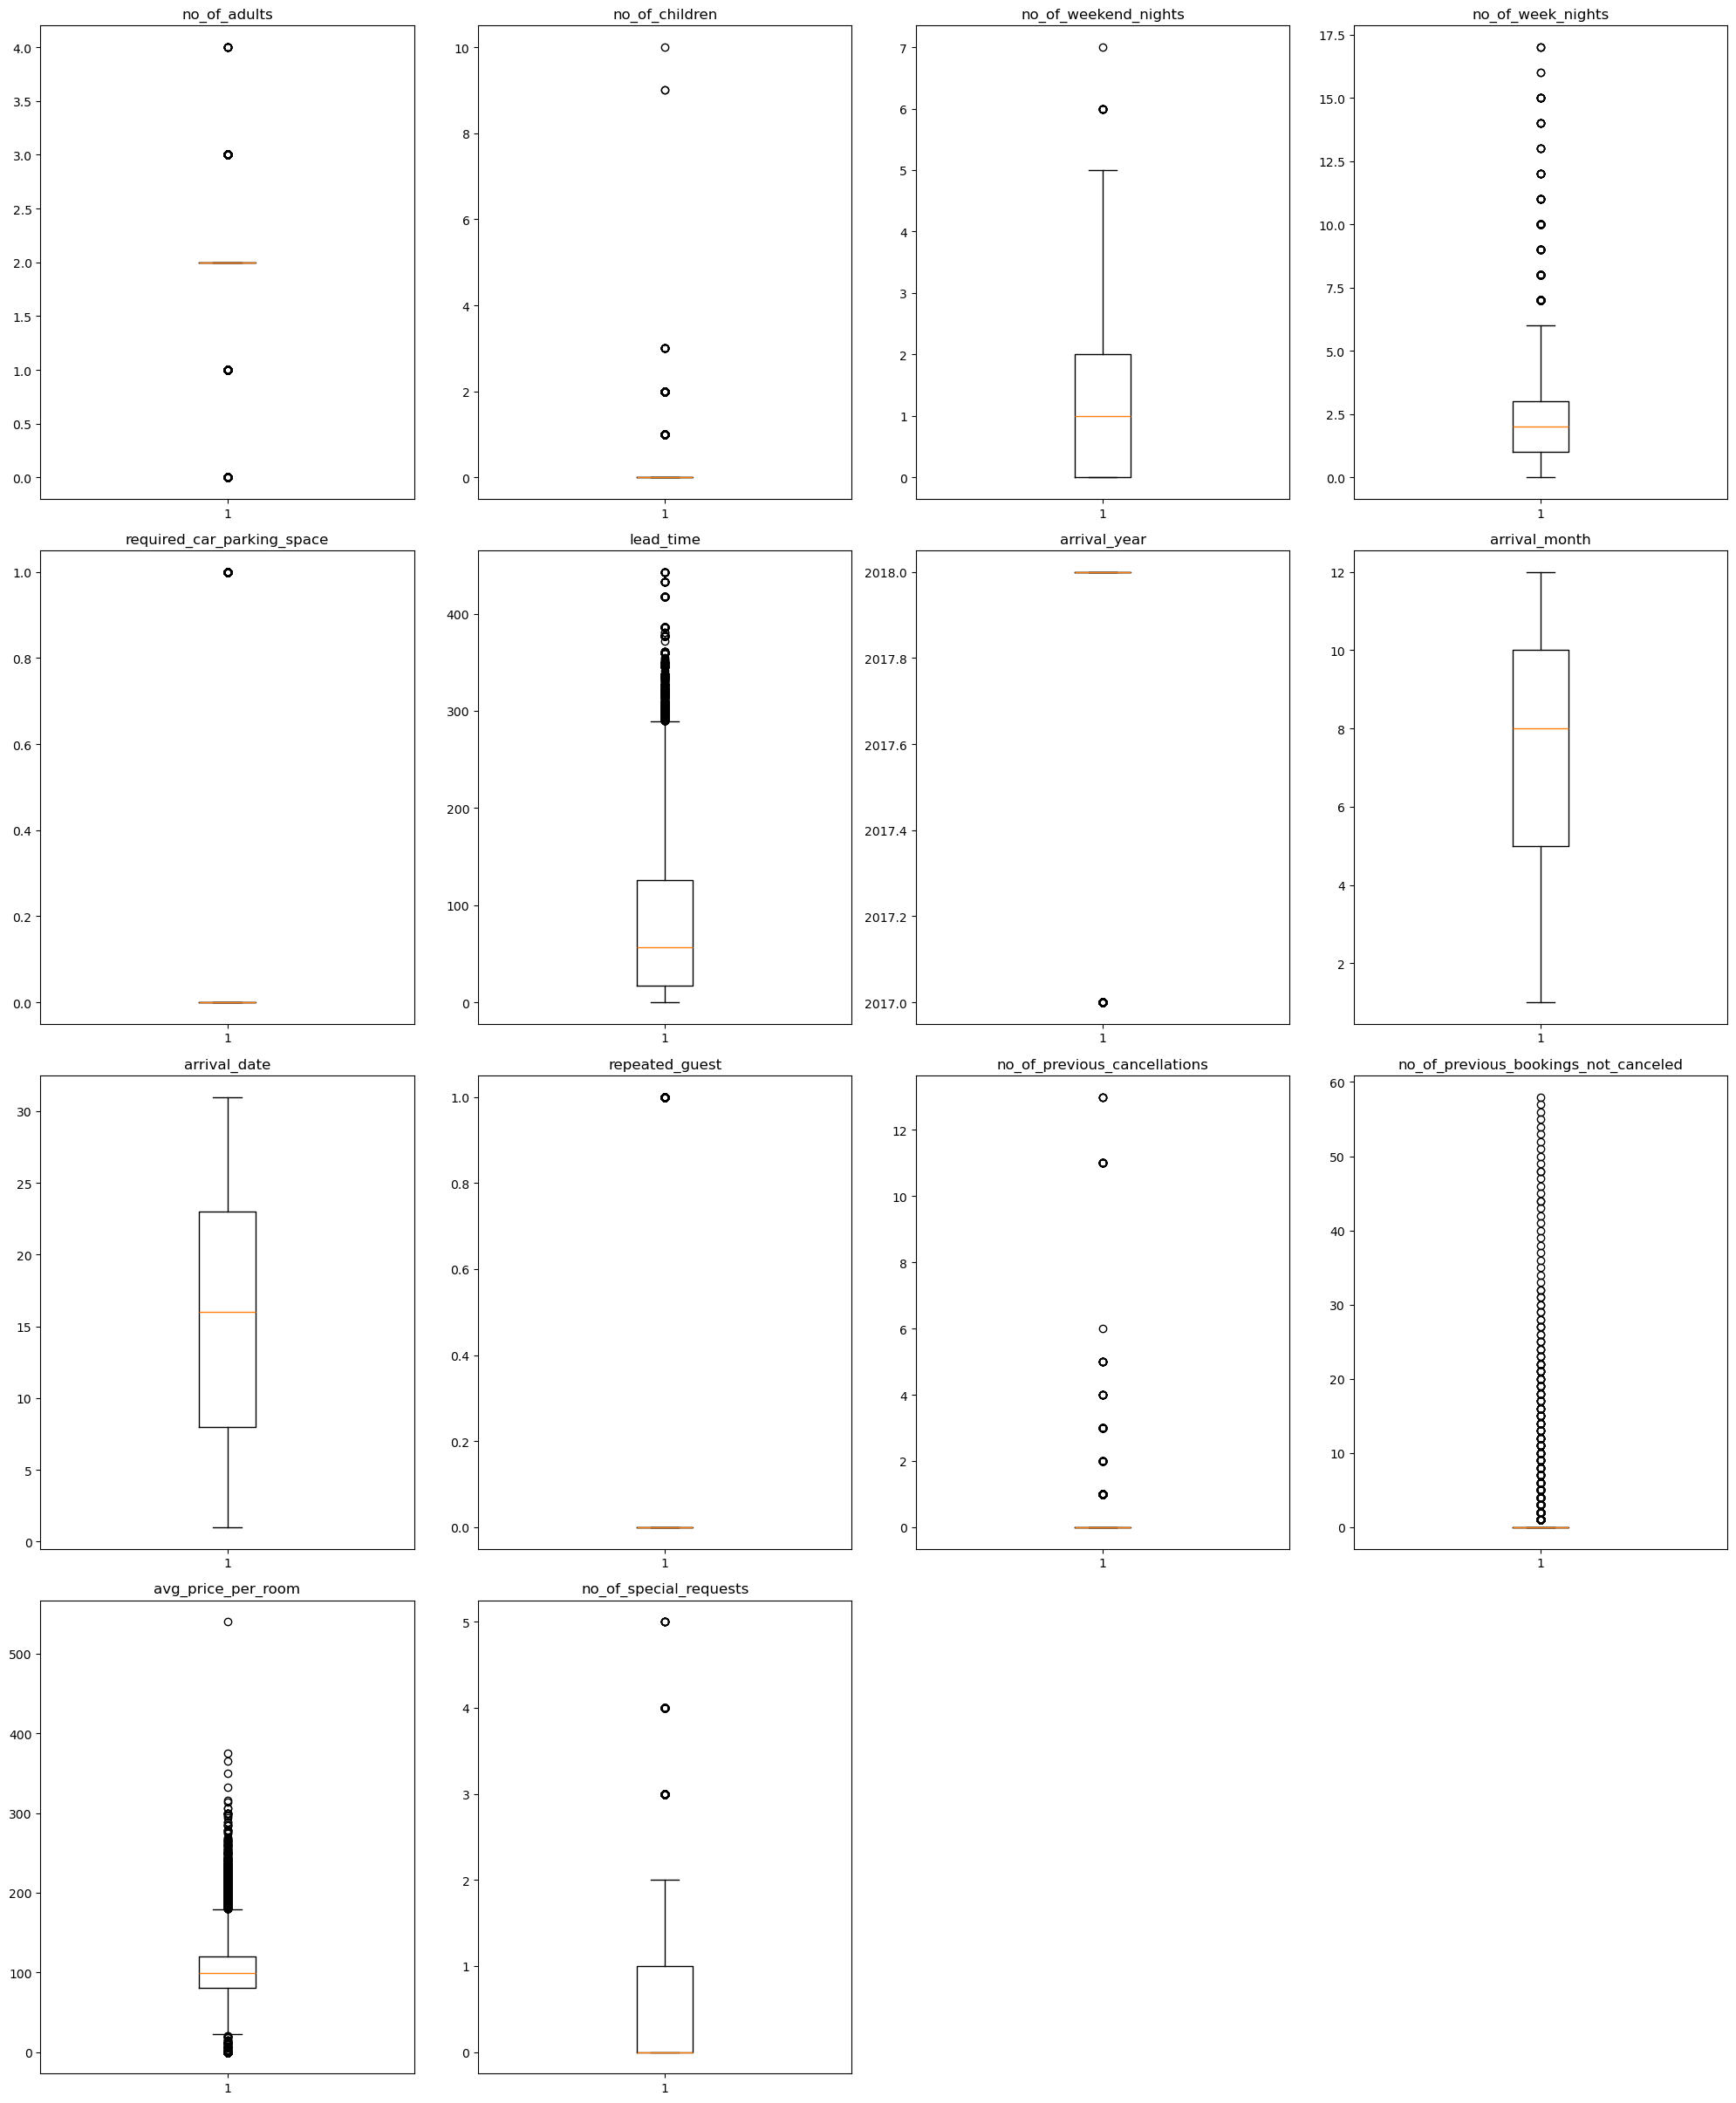

In [85]:
# Reinitialize the new numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

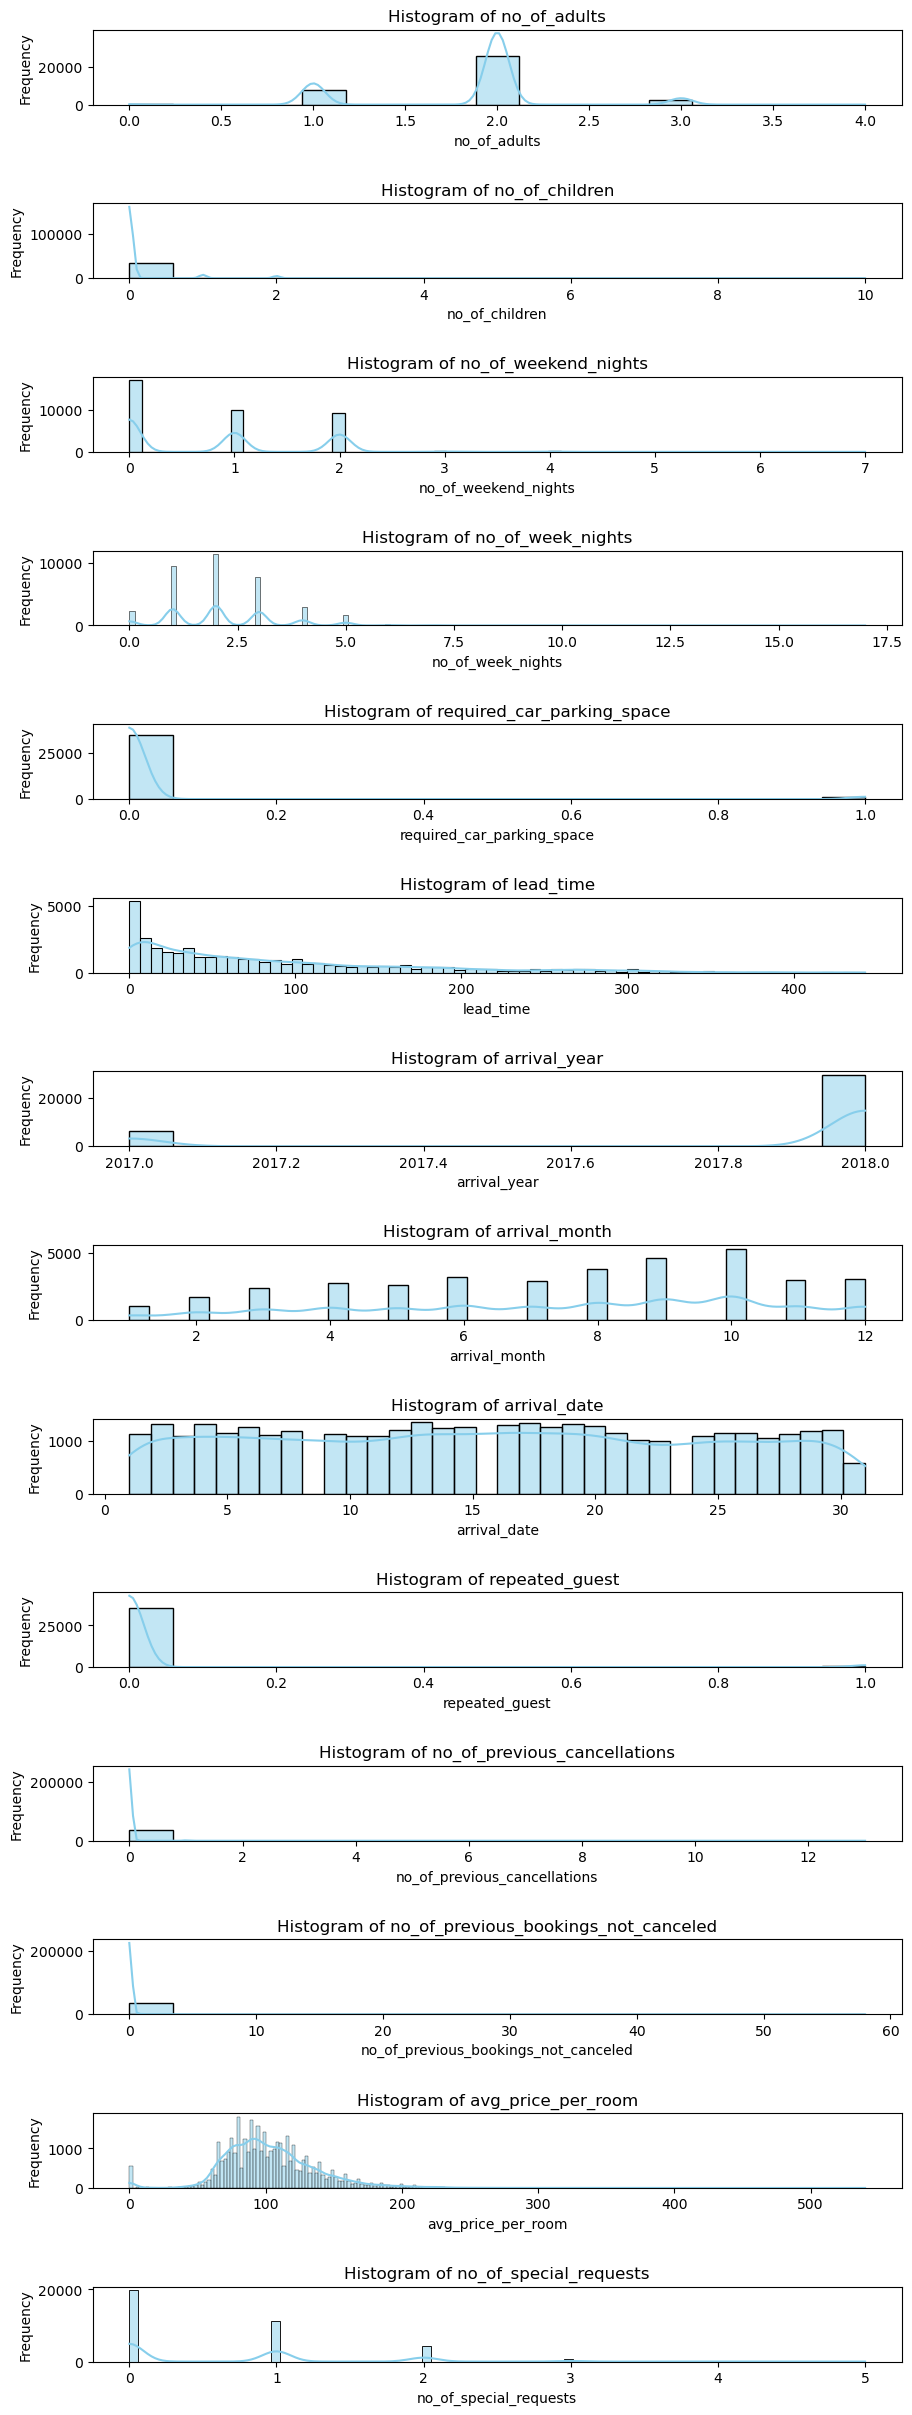

In [87]:
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 25))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], kde=True, ax=axes[i], color="skyblue", edgecolor="black")
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.show()

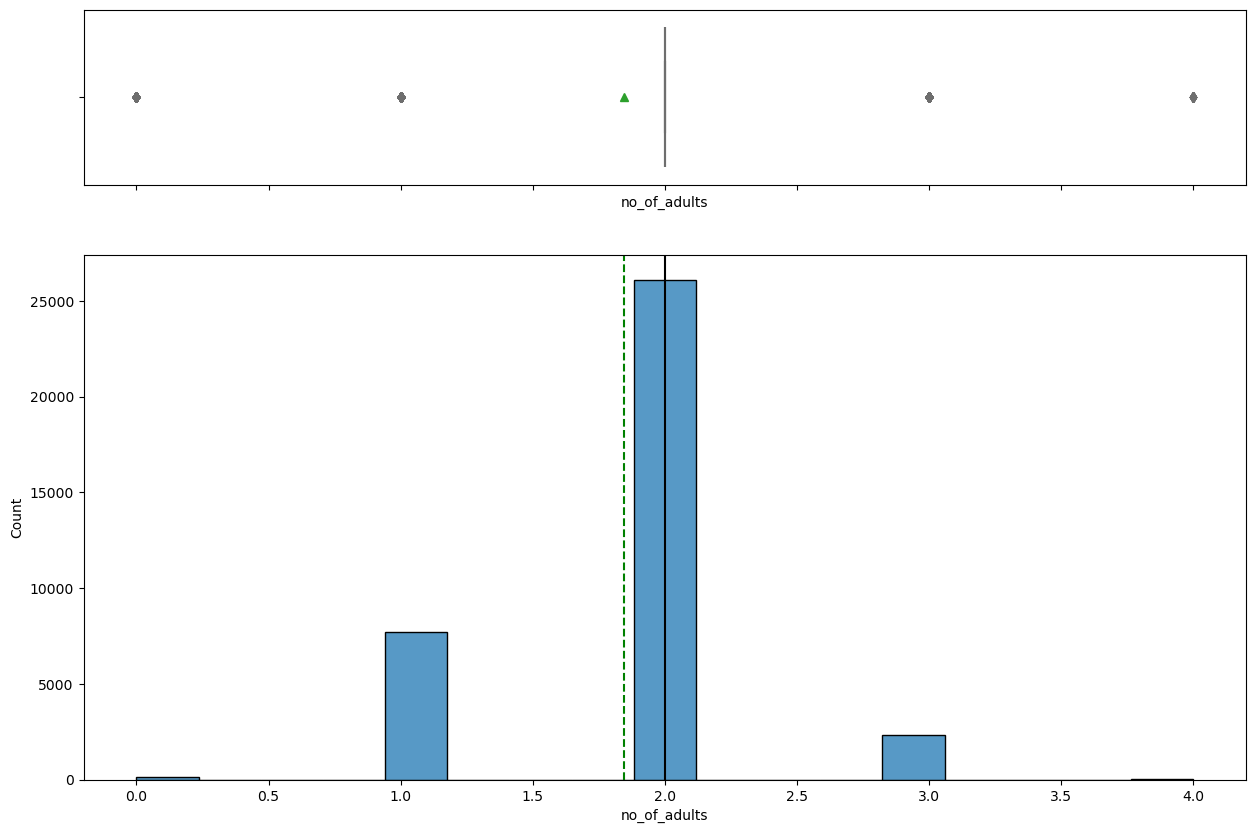

In [89]:
histogram_boxplot(data, "no_of_adults")

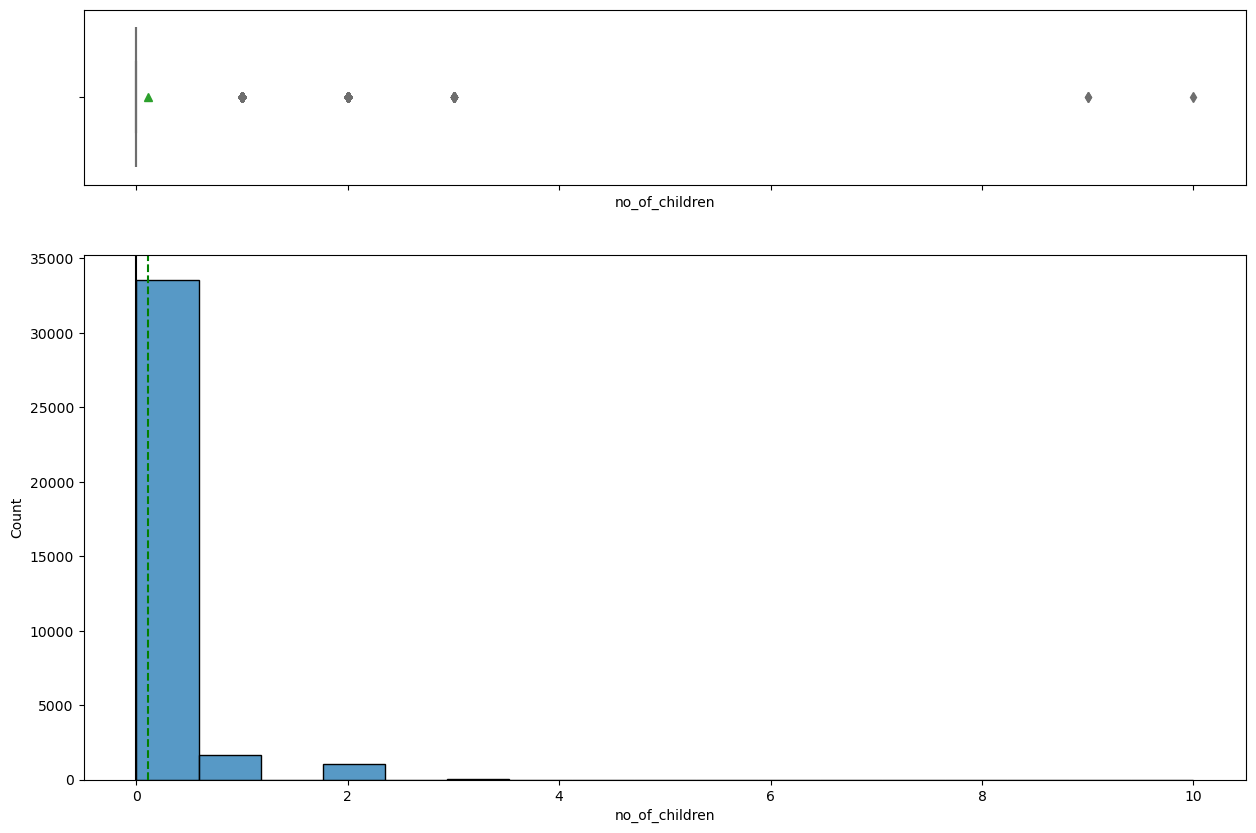

In [91]:
histogram_boxplot(data, "no_of_children")

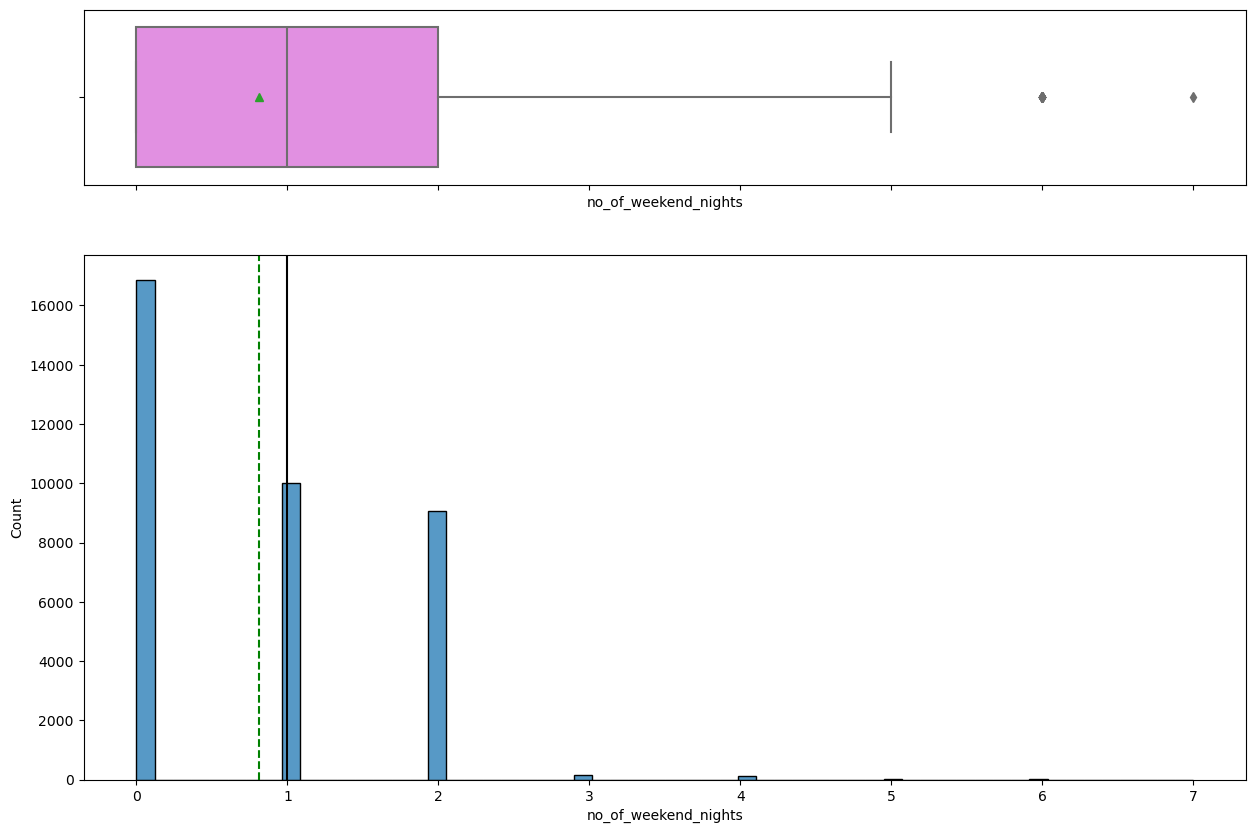

In [93]:
histogram_boxplot(data, "no_of_weekend_nights")

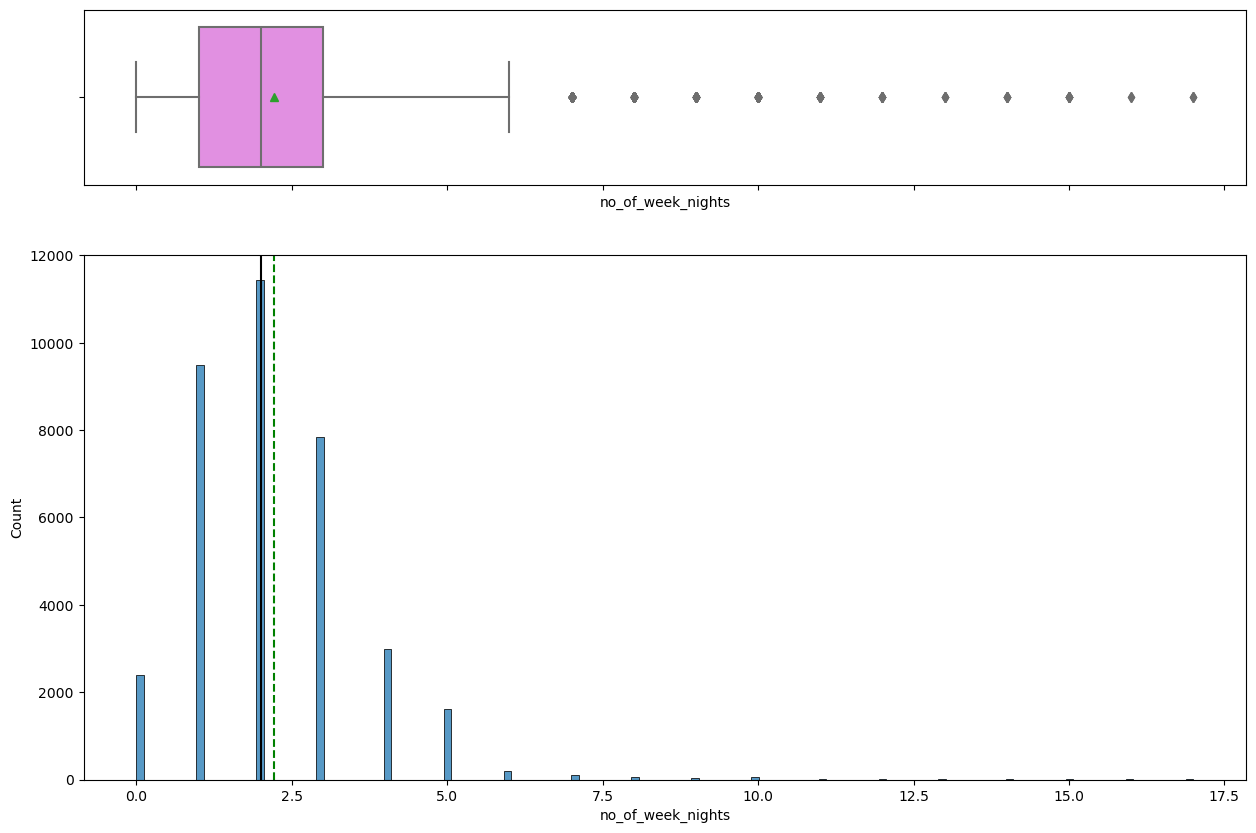

In [95]:
histogram_boxplot(data, "no_of_week_nights")

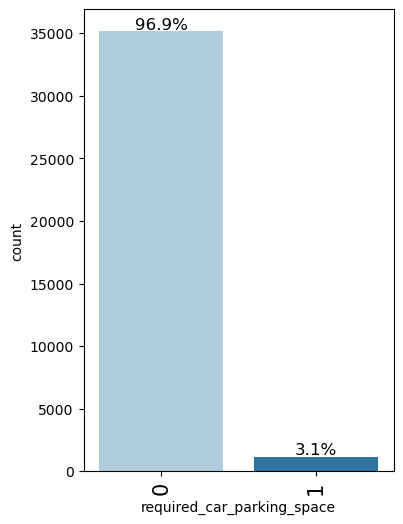

In [117]:
labeled_barplot(data, "required_car_parking_space", perc=True)

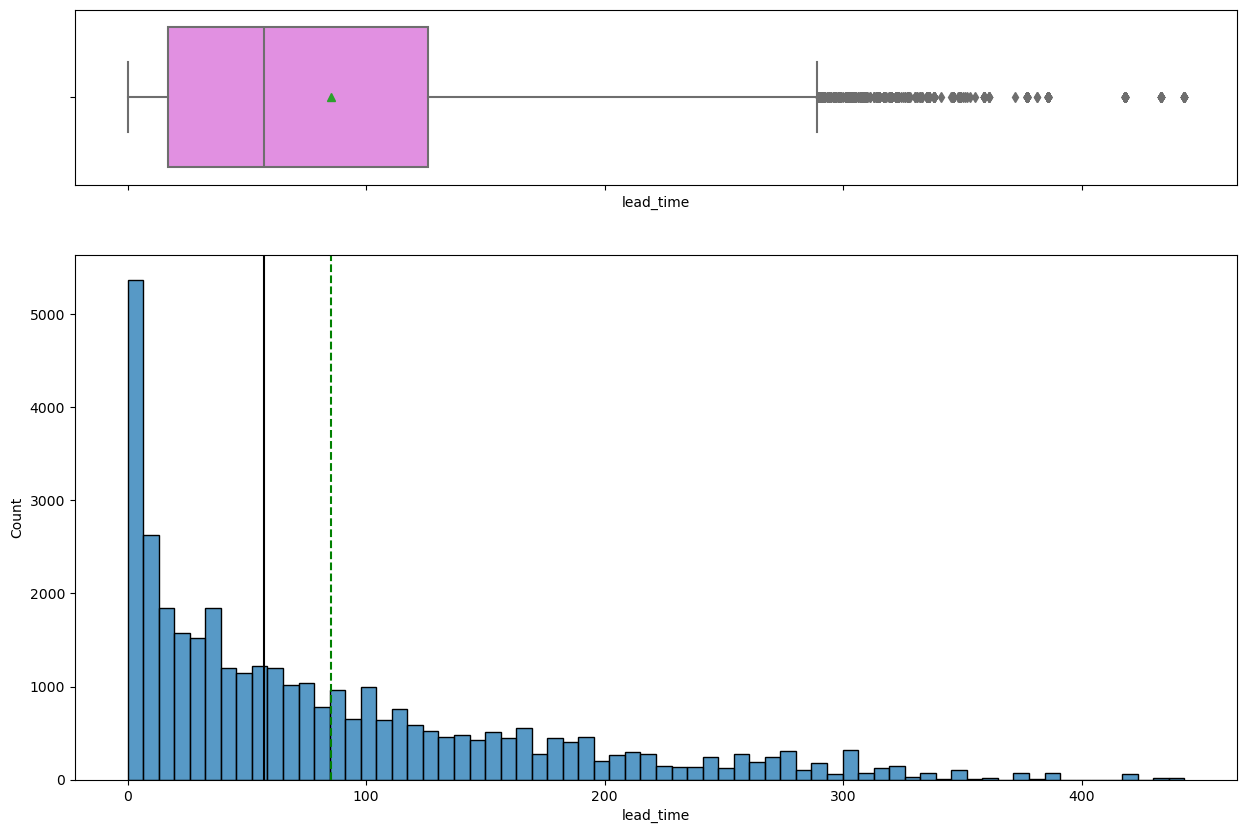

In [99]:
histogram_boxplot(data, "lead_time")

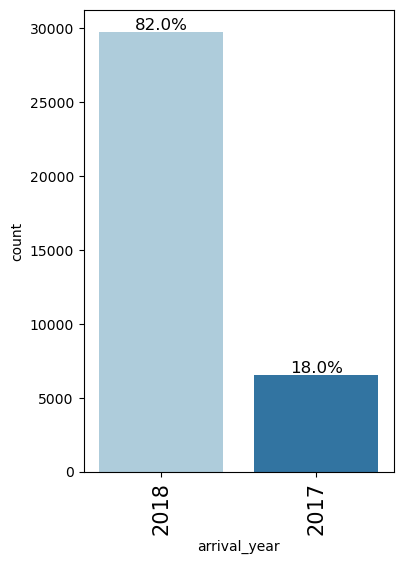

In [119]:
labeled_barplot(data, "arrival_year", perc=True)

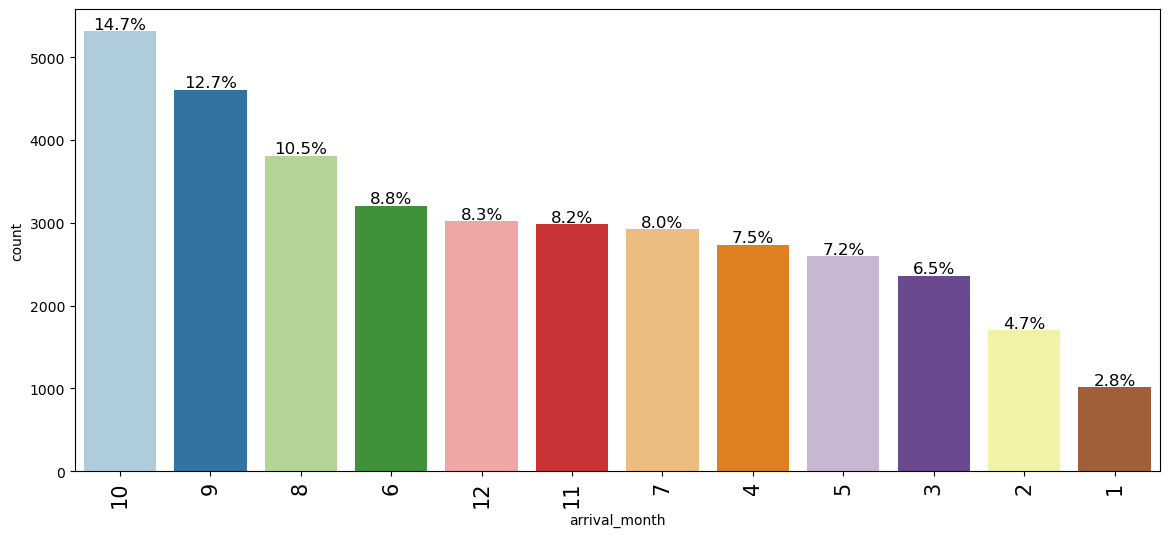

In [121]:
labeled_barplot(data, "arrival_month", perc=True)

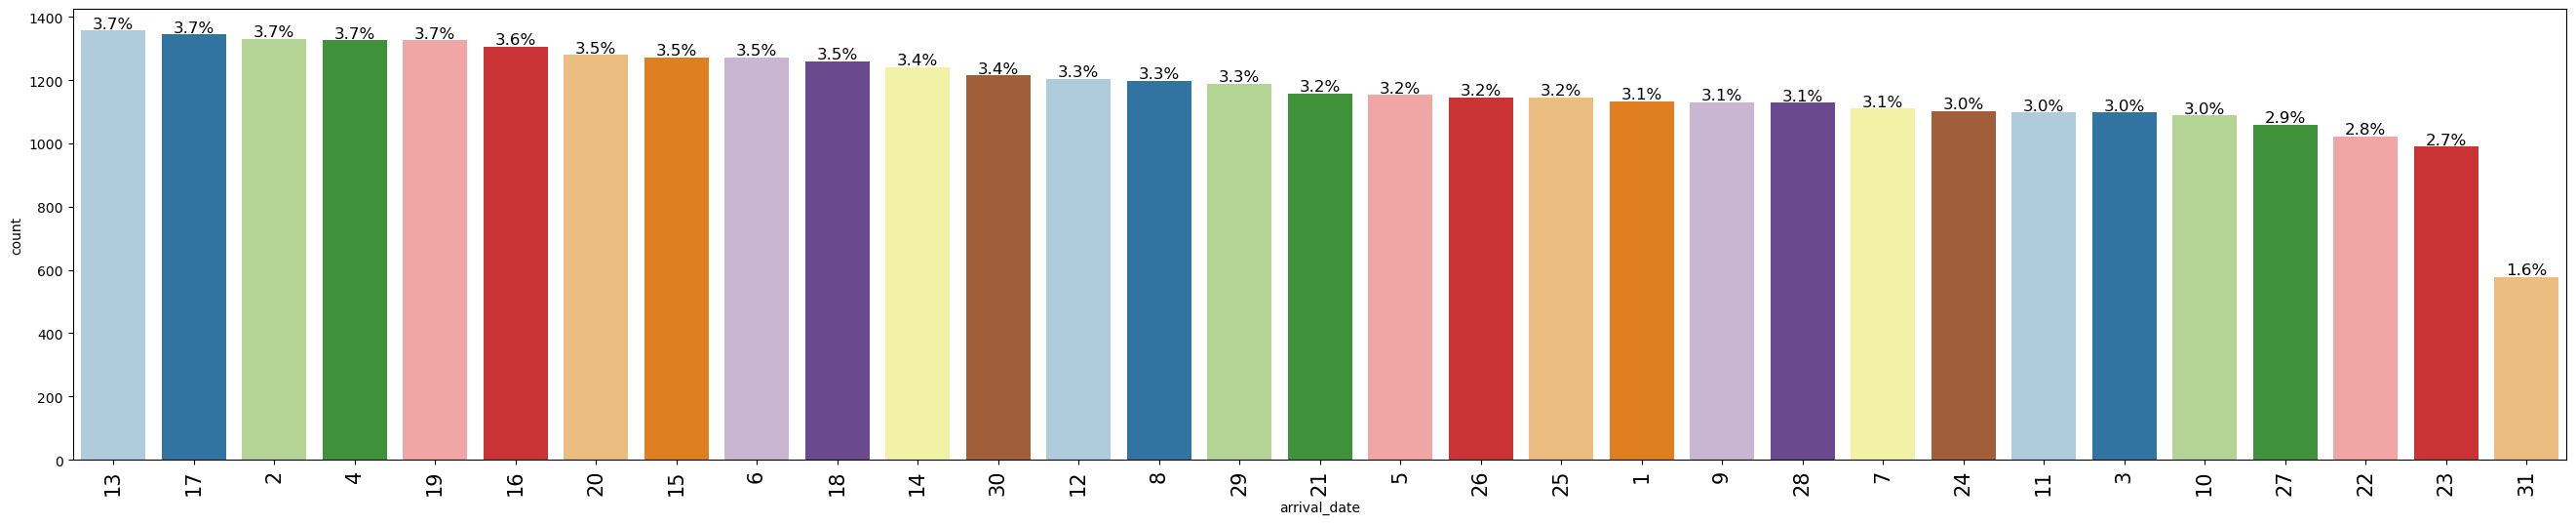

In [123]:
labeled_barplot(data, "arrival_date", perc=True)

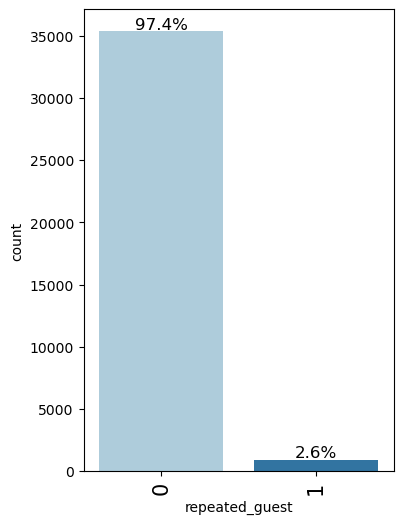

In [125]:
labeled_barplot(data, "repeated_guest", perc=True)

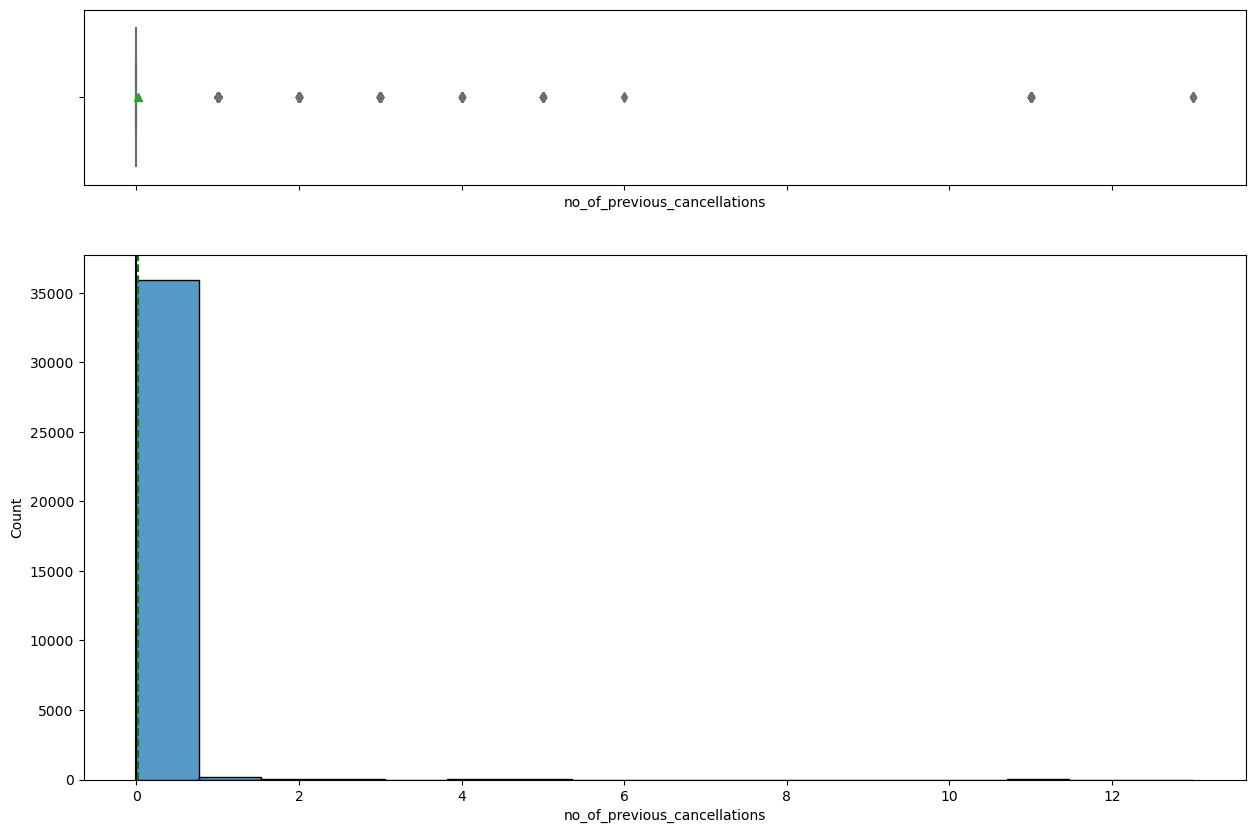

In [129]:
histogram_boxplot(data, "no_of_previous_cancellations")

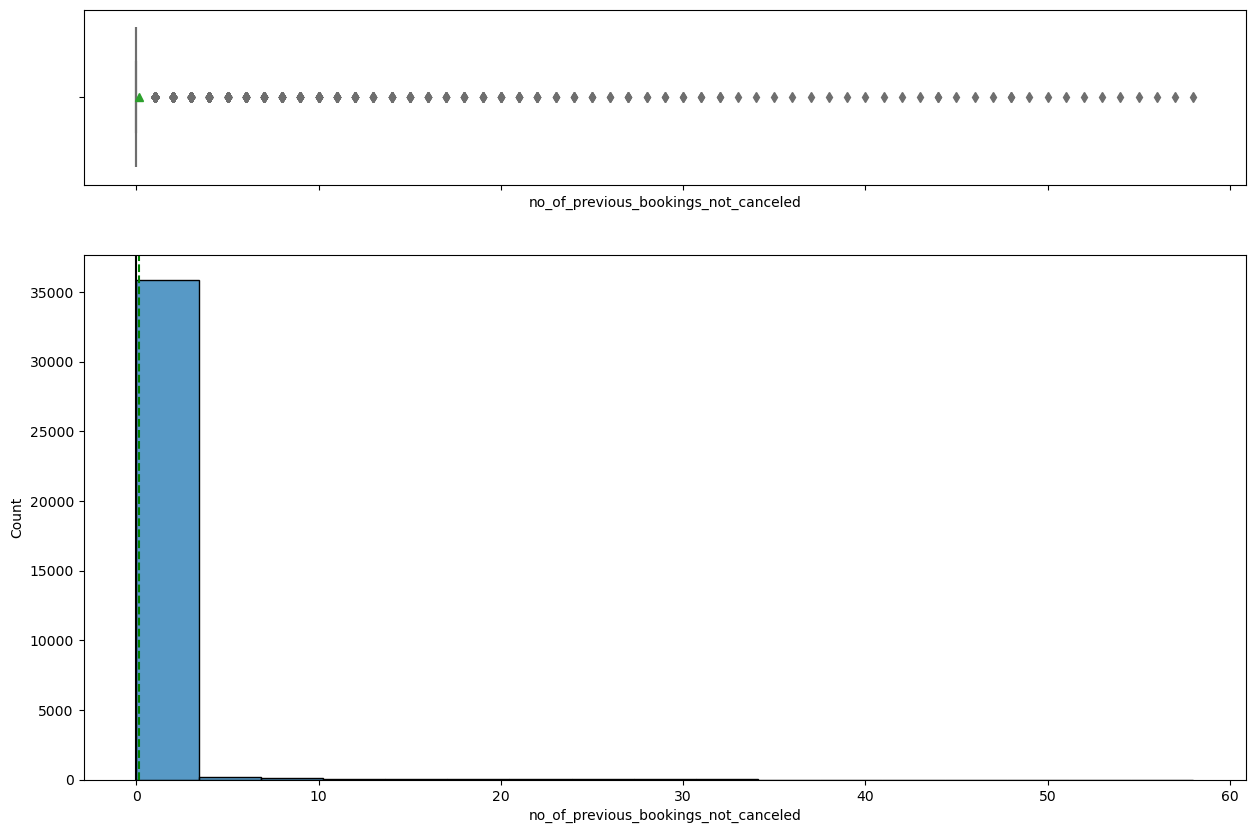

In [111]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

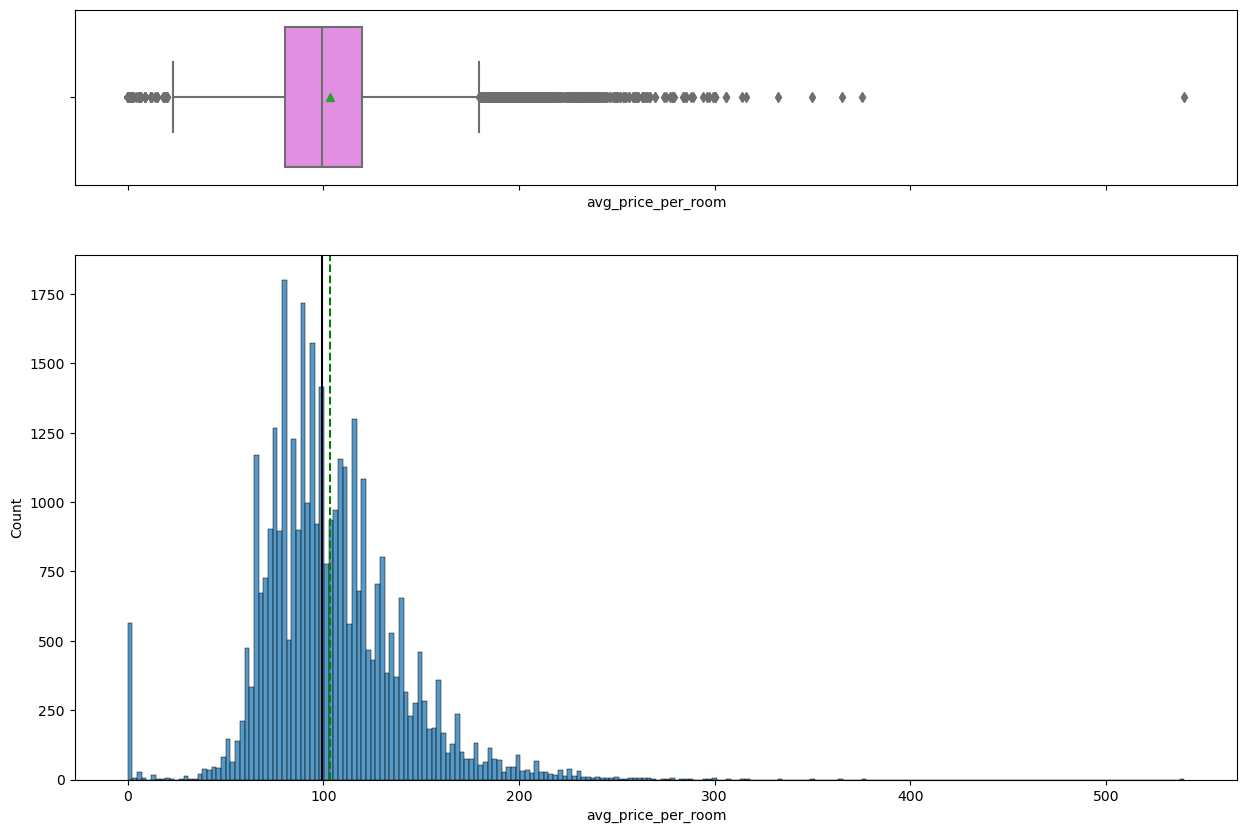

In [113]:
histogram_boxplot(data, "avg_price_per_room")

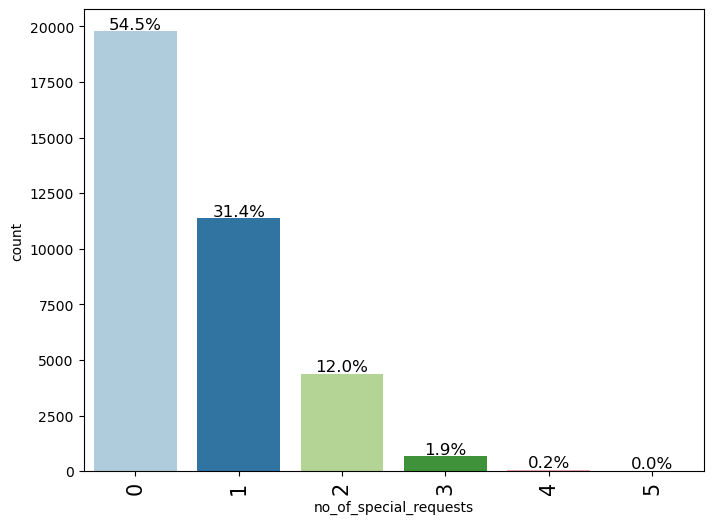

In [131]:
labeled_barplot(data, "no_of_special_requests", perc=True)

### Bivariate Analysis

#### Correlation Check

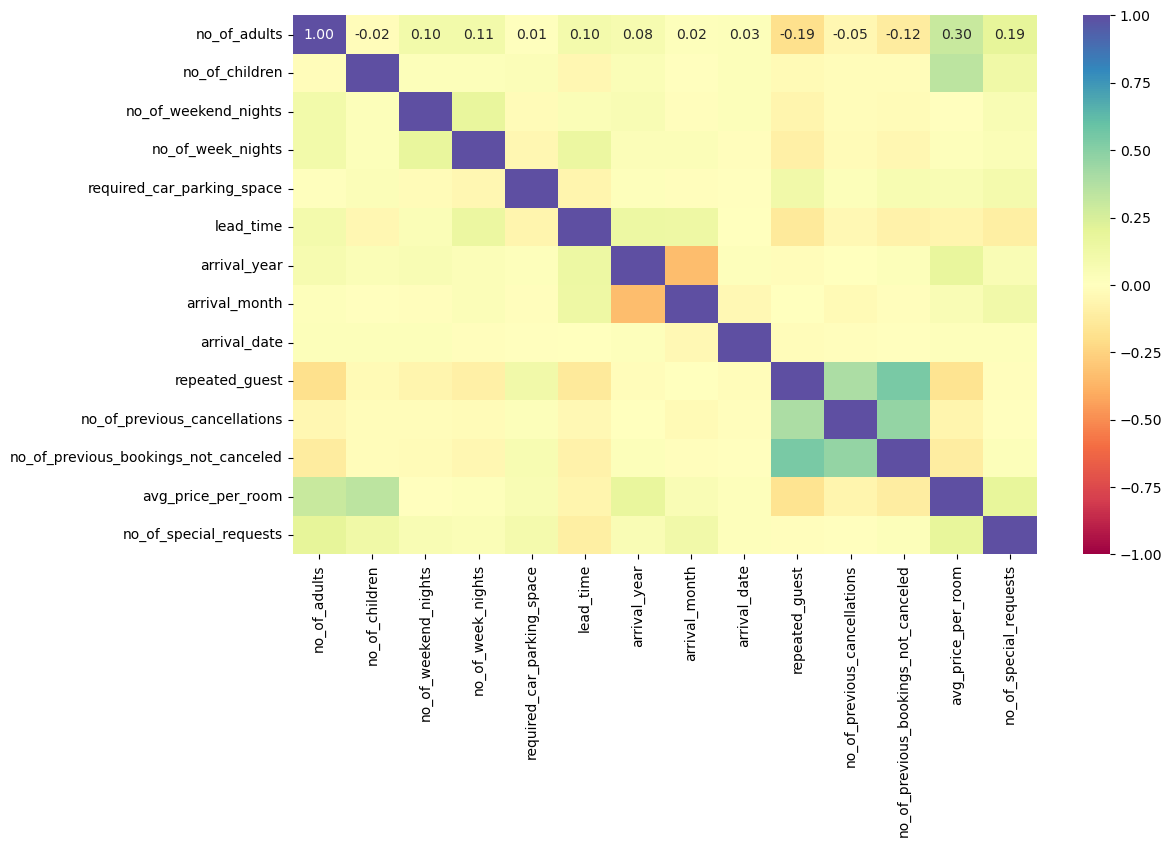

In [139]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

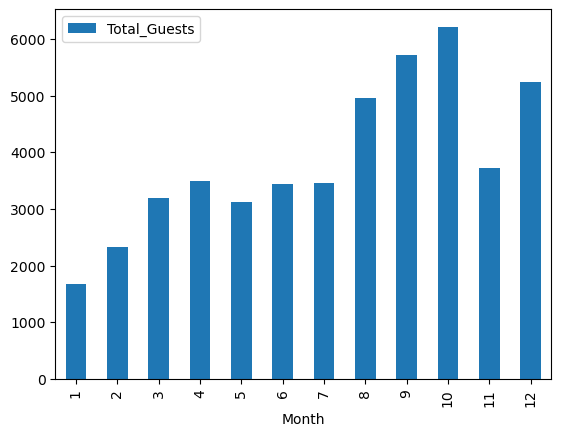

In [150]:
# Total guest in attendance based on "Not_Canceled" bookings

# Create Temporary df for months & total guests
Months = np.arange(1,13)
total_guests_data = []

# iterate through the Months df to group total guests to each month
for i in Months:
    m = data[(data.arrival_month == i) & (data.booking_status == "Not_Canceled")]
    total_guests = sum(m.no_of_adults) + sum(m.no_of_children)
    total_guests_data.append({"Month": i, "Total_Guests": total_guests})
    i + 1
total_guests_data = pd.DataFrame(total_guests_data)

# Create bar plot
total_guests_data.plot(x="Month", y="Total_Guests", kind="bar")
plt.show()

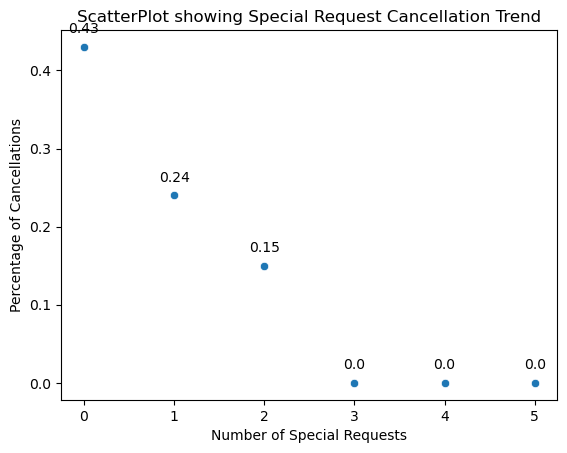

In [158]:
total_cancelled_booking_sr_data = []
annotations = []
special_request = np.arange(0, 6)

# Iterate through the number of special requests
for i in special_request:
    HG_sr_c = data[(data.no_of_special_requests == i) & (data.booking_status == "Canceled")]
    HG_sr = data[data.no_of_special_requests == i]
    
    # Calculate percentage of cancellations
    total_requests = HG_sr.no_of_special_requests.count()
    if total_requests == 0:
        perc_Calculation = 0  # Avoid division by zero
    else:
        perc_Calculation = round(HG_sr_c.no_of_special_requests.count() / total_requests, 2)
    
    # Append data for DataFrame creation
    total_cancelled_booking_sr_data.append({
        "number_of_special_request": i,
        "perc_of_cancelation": perc_Calculation
    })
    annotations.append(perc_Calculation)

# Create DataFrame from the list of dictionaries
total_cancelled_booking_sr_df = pd.DataFrame(total_cancelled_booking_sr_data)

# Create scatter plot
sns.scatterplot(
    data=total_cancelled_booking_sr_df,
    x="number_of_special_request",
    y="perc_of_cancelation"
)
plt.title("ScatterPlot showing Special Request Cancellation Trend")
plt.xlabel("Number of Special Requests")
plt.ylabel("Percentage of Cancellations")

# Annotate each point in the scatter plot
for i, label in enumerate(annotations):
    plt.annotate(
        label,
        (total_cancelled_booking_sr_df.number_of_special_request[i], total_cancelled_booking_sr_df.perc_of_cancelation[i]),
        textcoords="offset points", xytext=(0, 10), ha='center'
    )

plt.show()

Observation:
*  
43% of cancellations happened when guest had 0 special requests during their booking process. This percentage became incrementally smaller as more special requests were fil.
* .
Adding in proactive options for special requests during the booking process may help reduce the chance of a guest cancelling their booking.

### 1. What are the busiest months in the hotel?

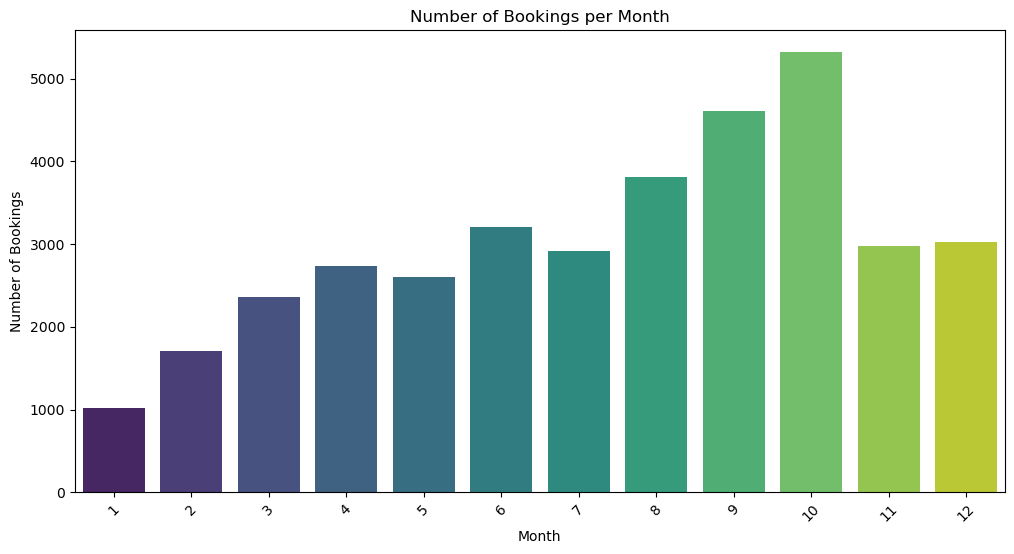

In [168]:
monthly_bookings = data.groupby('arrival_month').size().reset_index(name='bookings_count')

# Sort the dataframe by 'bookings_count' in descending order
monthly_bookings_sorted = monthly_bookings.sort_values(by='bookings_count', ascending=False)

# Create a bar plot to visualize the number of bookings per month
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_bookings_sorted, x='arrival_month', y='bookings_count', palette='viridis')
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

We can see that the month of October is the busiest month in the hotel, then September then August.

### 2. Which market segment do most of the guests come from?

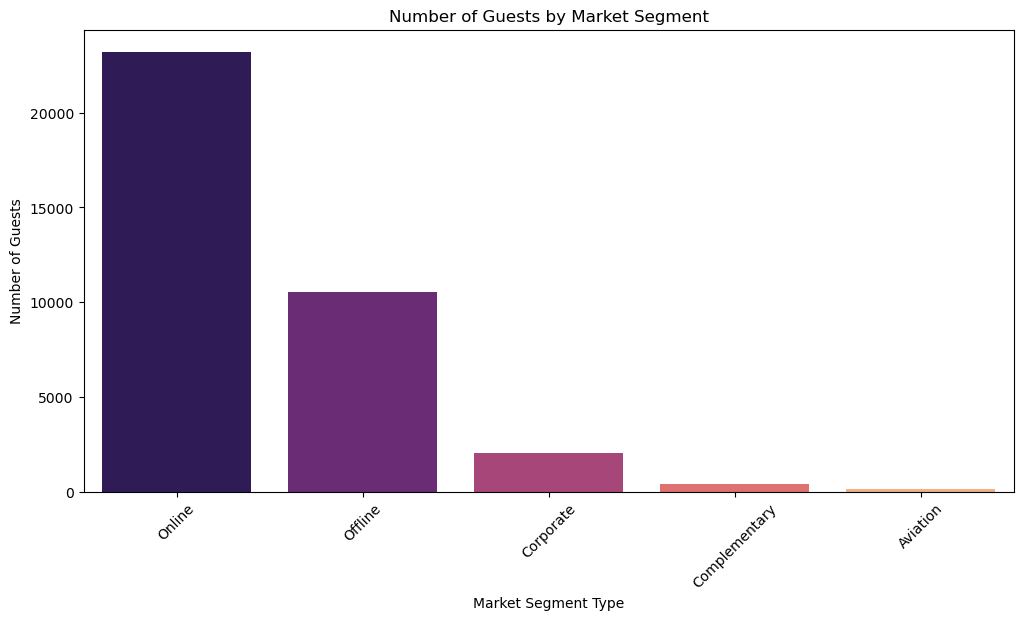

  market_segment_type  count
0              Online  23214
1             Offline  10528
2           Corporate   2017
3       Complementary    391
4            Aviation    125


In [177]:
# Count the number of guests from each market segment
market_segment_type_counts = data['market_segment_type'].value_counts().reset_index()
market_segment_type_counts.columns = ['market_segment_type', 'count']

# Sort the market segments by count in descending order
market_segment_type_counts_sorted = market_segment_type_counts.sort_values(by='count', ascending=False)

# Create a bar plot to visualize the distribution of market segments
plt.figure(figsize=(12, 6))
sns.barplot(data=market_segment_type_counts_sorted, x='market_segment_type', y='count', palette='magma')
plt.title('Number of Guests by Market Segment')
plt.xlabel('Market Segment Type')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.show()

# Display the sorted market segment data
print(market_segment_type_counts_sorted)

* Most of the guests come from online market segment.

### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

  market_segment_type       count      mean      std      min      25%  \
0            Aviation   125.00000 100.70400  8.53836 79.00000 95.00000   
1       Complementary   391.00000   3.14176 15.51297  0.00000  0.00000   
2           Corporate  2017.00000  82.91174 23.69000 31.00000 65.00000   
3             Offline 10528.00000  91.63268 24.99560 12.00000 75.00000   
4              Online 23214.00000 112.25685 35.22032  0.00000 89.00000   

        50%       75%       max  
0  95.00000 110.00000 110.00000  
1   0.00000   0.00000 170.00000  
2  79.00000  95.00000 220.00000  
3  90.00000 109.00000 540.00000  
4 107.10000 131.75000 375.50000  


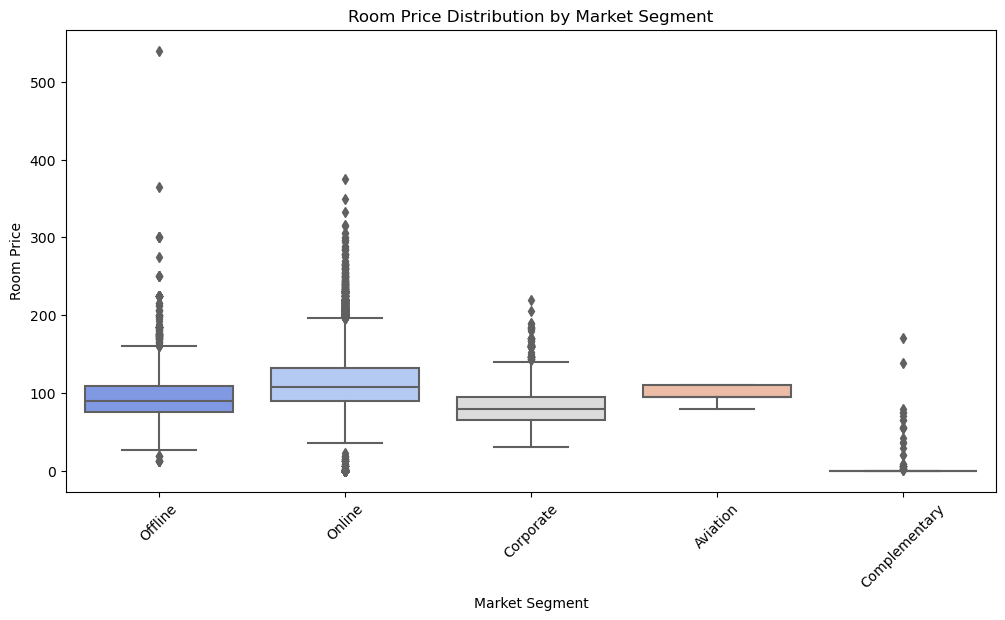

In [190]:
# Check and adjust column names based on actual data
market_segment_column = 'market_segment_type'  # Replace with the correct column name if different
price_column = 'avg_price_per_room'  # Replace with the correct column name for room prices

# Calculate descriptive statistics for room prices by market segment
price_stats = data.groupby(market_segment_column)[price_column].describe().reset_index()

# Print the descriptive statistics
print(price_stats)

# Visualize the differences using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x=market_segment_column, y=price_column, palette='coolwarm')
plt.title('Room Price Distribution by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Room Price')
plt.xticks(rotation=45)
plt.show()

The bookings by online market segment are having highest price for the rooms, then comes offline segment bookings and then aviation.

### 4. What percentage of bookings are canceled?

In [197]:
# Check and adjust column names based on actual data
booking_status_column = 'booking_status'  # Replace with the correct column name if different

# Count total bookings
total_bookings = len(data)

# Count canceled bookings
canceled_bookings = len(data[data[booking_status_column] == 'Canceled'])

# Calculate the percentage of canceled bookings
canceled_percentage = (canceled_bookings / total_bookings) * 100

# Print the percentage of canceled bookings
print(f"Percentage of bookings that are canceled: {canceled_percentage:.2f}%")

Percentage of bookings that are canceled: 32.76%


### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [200]:
# Identify repeating guests
repeating_guests_data = data[data['repeated_guest'] == 1]

# Calculate the number of cancellations by repeating guests
cancellations_by_repeating_guests = repeating_guests_data[repeating_guests_data['booking_status'] == 'Canceled'].shape[0]

# Calculate the total number of bookings by repeating guests
total_bookings_by_repeating_guests = repeating_guests_data.shape[0]

# Calculate the percentage of repeating guests who cancel
percentage_cancellations = (cancellations_by_repeating_guests / total_bookings_by_repeating_guests) * 100

percentage_cancellations

1.7204301075268817

The percentage of repeating guests cancel booking is 1.72 %

### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [204]:
guests_with_special_requests = data[data['no_of_special_requests'] > 0]
guests_without_special_requests = data[data['no_of_special_requests'] == 0]

# Calculate the cancellation rate for guests with special requests
cancellations_with_special_requests = guests_with_special_requests[guests_with_special_requests['booking_status'] == 'Canceled'].shape[0]
total_with_special_requests = guests_with_special_requests.shape[0]
cancellation_rate_with_special_requests = (cancellations_with_special_requests / total_with_special_requests) * 100

# Calculate the cancellation rate for guests without special requests
cancellations_without_special_requests = guests_without_special_requests[guests_without_special_requests['booking_status'] == 'Canceled'].shape[0]
total_without_special_requests = guests_without_special_requests.shape[0]
cancellation_rate_without_special_requests = (cancellations_without_special_requests / total_without_special_requests) * 100

cancellation_rate_with_special_requests, cancellation_rate_without_special_requests

(20.24487816705055, 43.2067553218385)

The analysis shows the following cancellation rates:

* Guests with special requests: 20.24%
* Guests without special requests: 43.21%

This indicates that guests without special requests have a significantly higher cancellation rate compared to those with special requests. Thus, special requirements appear to affect booking cancellations, with guests who have special requests being less likely to cancel their bookings.

## Data Preprocessing

### Checking for missing values

In [209]:
# checking for null values
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no missing values in the data set.

### Checking for outliers.

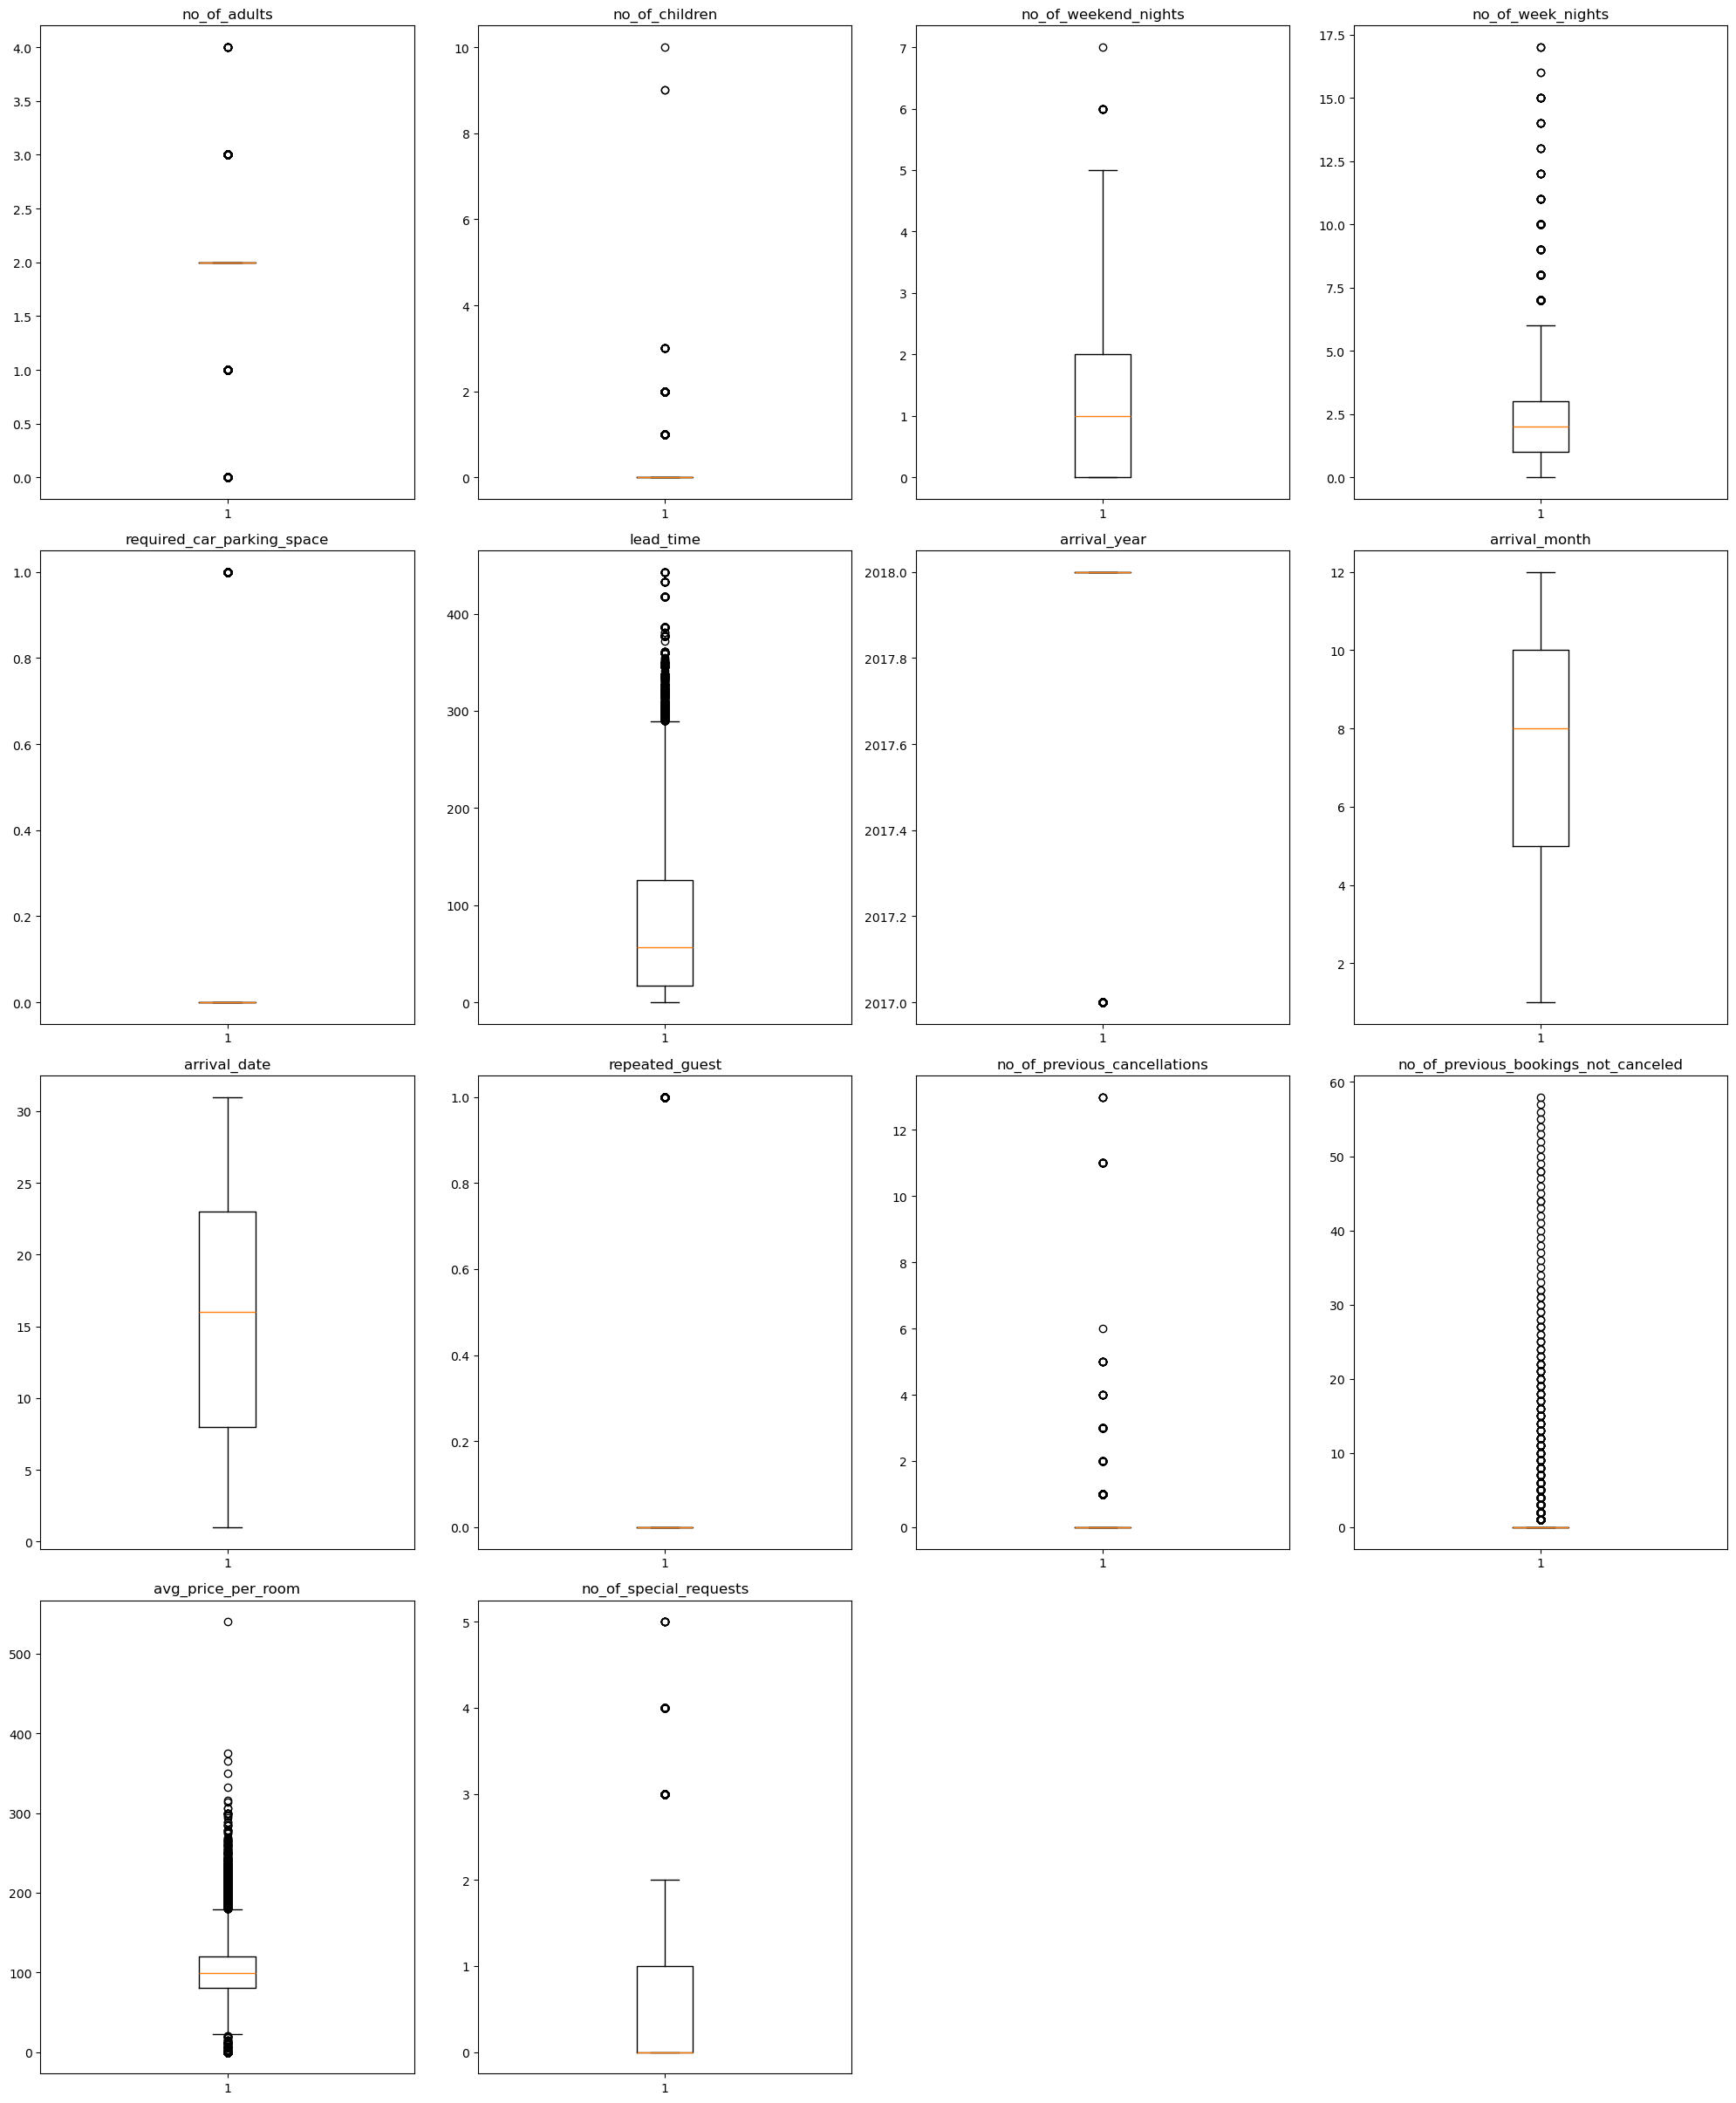

In [216]:
# Reinitialize the new numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**

While checking for outliers, I decided that these outliers for necessary for analysis as the data points could not be easily jusitified removal or scaling.


### Feature Engineering

In [226]:
# Convert Year, Month, and Day to a Date Integer for processing
data["dateInt"] = (
    data["arrival_year"].astype(str)
    + "-"
    + data["arrival_month"].astype(str).str.zfill(2)
    + "-"
    + data["arrival_date"].astype(str).str.zfill(2)
)

# Convert the DateInt Colum to a datetime dtype
data = data[data["dateInt"] != "2018-02-29"]
data["Date"] = pd.to_datetime(data["dateInt"], format="%Y-%m-%d")
data = data.drop("dateInt", axis=1)

#Convert Date to day of week
data["DayofWeek"] = data["Date"].dt.day_name().astype("category")
data = data.drop("arrival_date", axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36238 non-null  int64         
 1   no_of_children                        36238 non-null  int64         
 2   no_of_weekend_nights                  36238 non-null  int64         
 3   no_of_week_nights                     36238 non-null  int64         
 4   type_of_meal_plan                     36238 non-null  object        
 5   required_car_parking_space            36238 non-null  int64         
 6   room_type_reserved                    36238 non-null  object        
 7   lead_time                             36238 non-null  int64         
 8   arrival_year                          36238 non-null  int64         
 9   arrival_month                         36238 non-null  int64         
 10  mar

In [229]:
columns_c = data.select_dtypes(include=["int64"]).columns.tolist()
for i in columns_c:
    print(f"Value Count for {i}")
    print(data[i].value_counts())
    print(f"To verify total counts {data[i].count()}")
    print("*" * 50)

Value Count for no_of_adults
no_of_adults
2    26091
1     7676
3     2316
0      139
4       16
Name: count, dtype: int64
To verify total counts 36238
**************************************************
Value Count for no_of_children
no_of_children
0     33544
1      1616
2      1056
3        19
9         2
10        1
Name: count, dtype: int64
To verify total counts 36238
**************************************************
Value Count for no_of_weekend_nights
no_of_weekend_nights
0    16872
1     9959
2     9071
3      152
4      129
5       34
6       20
7        1
Name: count, dtype: int64
To verify total counts 36238
**************************************************
Value Count for no_of_week_nights
no_of_week_nights
2     11433
1      9481
3      7829
4      2989
0      2383
5      1611
6       189
7       112
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64
To verify total counts 3623

**Observations:**
There are m
Many categorical types for int64, move forward with grouping

In [234]:
# can add custom labels
data["lead_time_bin"] = pd.cut(
    data["lead_time"],
    [-np.inf, 30, 90, 180, 365, np.inf],
    labels=[
        "30_days",
        "30_to_90_days",
        "90_days_to_half_year",
        "half_year_to_year",
        "more_than_year",
    ],
)
data.drop(["lead_time"], axis=1, inplace=True)
data["lead_time_bin"].value_counts(dropna=False)

lead_time_bin
30_days                 12392
30_to_90_days           10805
90_days_to_half_year     7764
half_year_to_year        5034
more_than_year            243
Name: count, dtype: int64

In [236]:
# can add custom labels
data["no_of_children_bin"] = pd.cut(
    data["no_of_children"],
    [-np.inf, 0, 1, 2, 3, np.inf],
    labels=["0", "1", "2", "3", "4 or more"],
)
data.drop(["no_of_children"], axis=1, inplace=True)
data["no_of_children_bin"].value_counts(dropna=False)

no_of_children_bin
0            33544
1             1616
2             1056
3               19
4 or more        3
Name: count, dtype: int64

In [238]:
# can add custom labels
data["no_of_previous_bookings_not_canceled_bin"] = pd.cut(
    data["no_of_previous_bookings_not_canceled"],
    [-np.inf, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, np.inf],
    labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11 or more"],
)
data.drop(["no_of_previous_bookings_not_canceled"], axis=1, inplace=True)
data["no_of_previous_bookings_not_canceled_bin"].value_counts(dropna=False)

no_of_previous_bookings_not_canceled_bin
0             35429
1               227
11 or more      145
2               112
3                80
4                65
5                60
6                36
7                24
8                23
9                19
10               18
Name: count, dtype: int64

In [242]:
# can add custom labels
data["no_of_previous_cancellations_bin"] = pd.cut(
    data["no_of_previous_cancellations"],
    [-np.inf, 0, 1, 2, 3, 4, 5, np.inf],
    labels=["0", "1", "2", "3", "4", "5", "6 or more"],
)
data.drop(["no_of_previous_cancellations"], axis=1, inplace=True)
data["no_of_previous_cancellations_bin"].value_counts(dropna=False)

no_of_previous_cancellations_bin
0            35901
1              197
2               46
3               43
6 or more       30
5               11
4               10
Name: count, dtype: int64

In [254]:
# defining X and y variables
drop_var = ["booking_status", "Date", "booking_status_encoded"]
X = data.drop(drop_var, axis="columns")
y = data["booking_status_encoded"]

# Create dummy variables for object and category dtypes
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, 0 to 36274
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   no_of_adults                                         36238 non-null  int64  
 1   no_of_weekend_nights                                 36238 non-null  int64  
 2   no_of_week_nights                                    36238 non-null  int64  
 3   required_car_parking_space                           36238 non-null  int64  
 4   arrival_year                                         36238 non-null  int64  
 5   arrival_month                                        36238 non-null  int64  
 6   repeated_guest                                       36238 non-null  int64  
 7   avg_price_per_room                                   36238 non-null  float64
 8   no_of_special_requests                               36238 non-null  in

In [258]:
# split X and y into training and testing datasets split into 70 to 30 size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))

print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Number of rows in train data = 25366
Number of rows in test data = 10872
Percentage of classes in training set:
booking_status_encoded
1   0.67074
0   0.32926
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status_encoded
1   0.67568
0   0.32432
Name: proportion, dtype: float64


* We had seen that around 67% of observations belongs to class 0 (Not cancelled) and 33% observations belongs to class 1 (cancelled), and this is preserved in the train and test sets

## Model Building

In [261]:
# fit a decision tree model using the gini critera
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [423]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [267]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

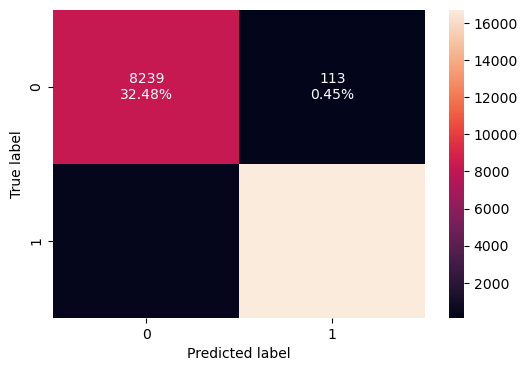

In [271]:
confusion_matrix_sklearn(model, X_train, y_train)

In [275]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train_without

Accuracy  Recall  Precision      F1
0   0.98403 0.98284    0.99329 0.98804

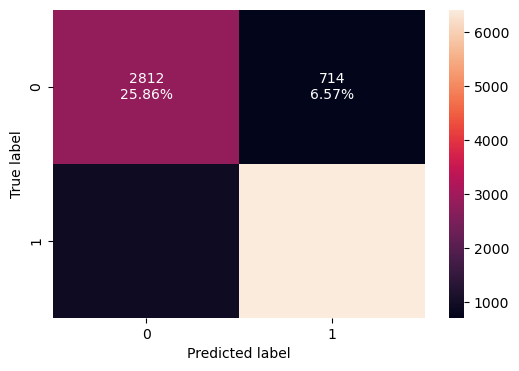

In [277]:
confusion_matrix_sklearn(model, X_test, y_test)

In [279]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test_without

Accuracy  Recall  Precision      F1
0   0.84842 0.87286    0.89980 0.88612

In [287]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

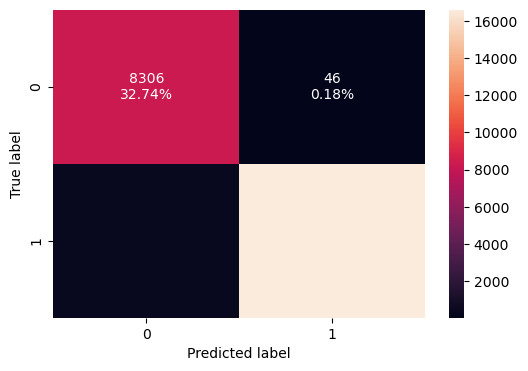

In [289]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [291]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.98179 0.97555    0.99724 0.98627

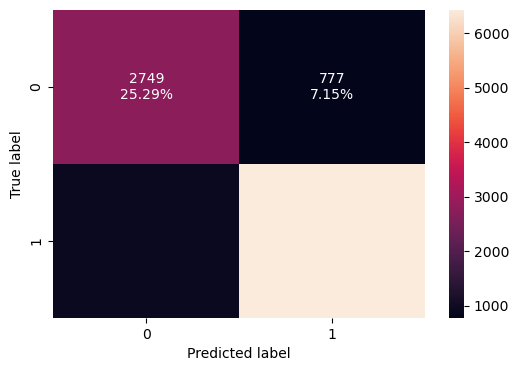

In [293]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [295]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.84437 0.87544    0.89220 0.88374

**Observations:**

As expected, the training data 's f1 score is very close to 1 while the testing data is nearing 90. While the model is capturing a good amount of test data, we can assume without tuning this model is overfitting.

In [297]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50, min_samples_split=70,
                       random_state=1)

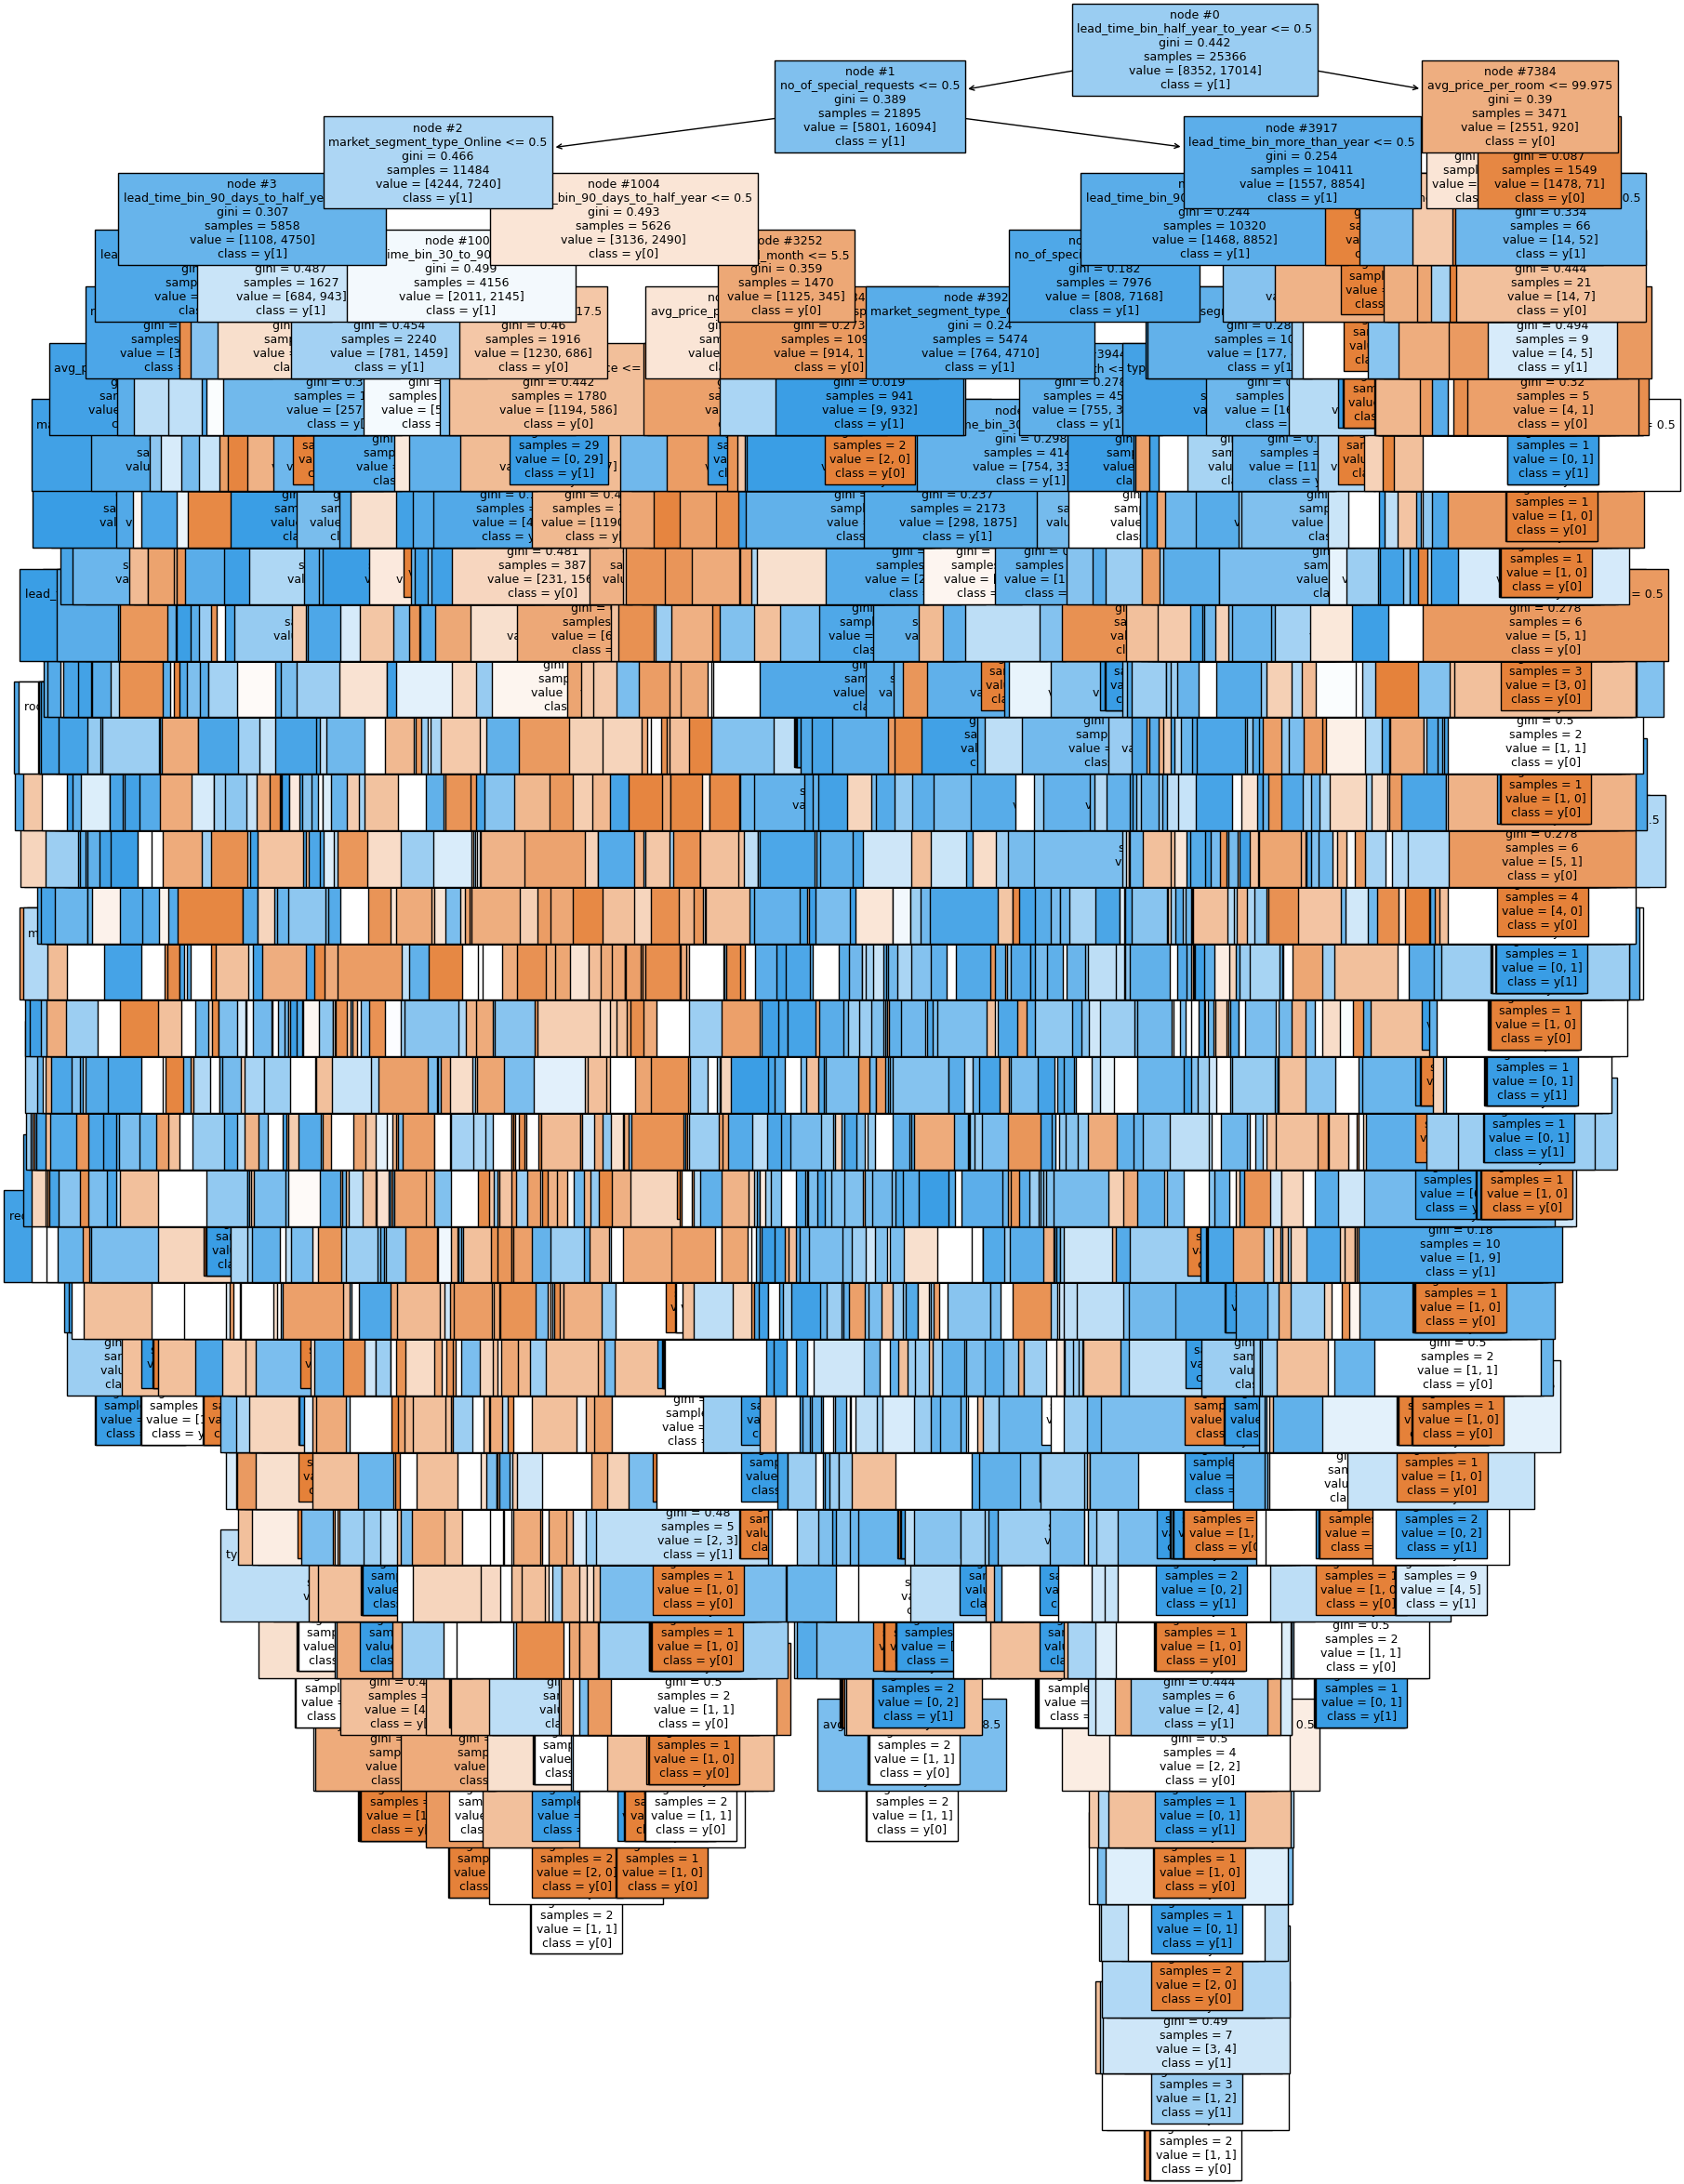

In [305]:
column_names = list(X.columns)
feature_names = column_names

plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


**Observation:**

Due to the overfitting, the decision tree branchs are very complex. Should look at limiting depth and post pruning

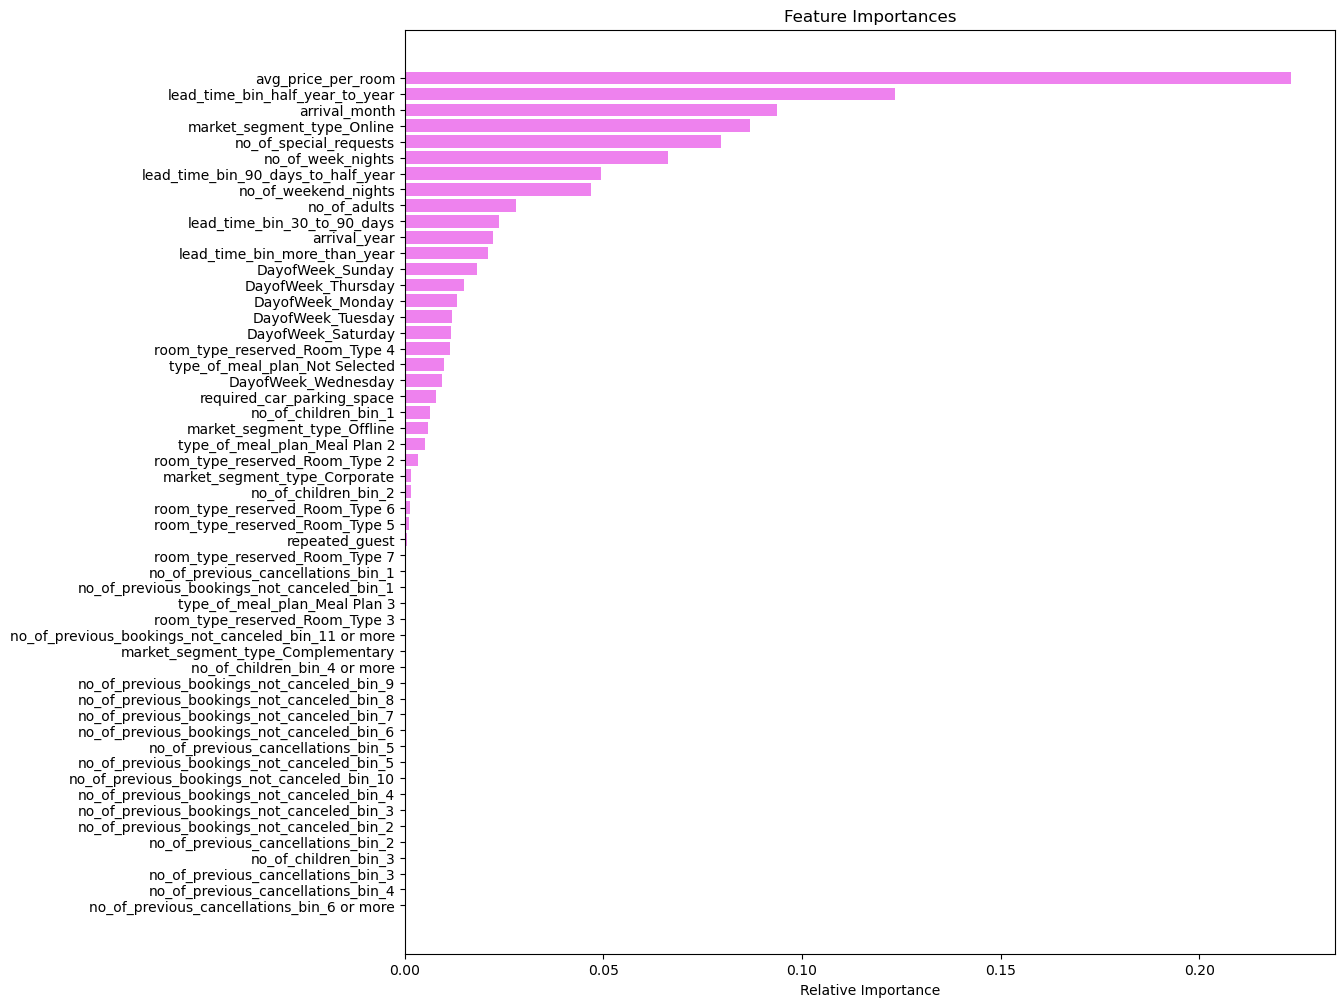

In [308]:
# Gather the model's important variables and sort by importance
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot importance variables
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation:**

The average price per room, the lead time inbetween 6 to 12 months, the arrival month, online booking, and number of special request have a high level of importance when determining if a guest will cancel.

## Model performance improvement

### Hyperparameter tuning

In [315]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [5, 10, 15],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001],
}

# Type of scoring used to compare parameter combinations
# Based on business needs, I decided to use F1_score as the metric
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15,
                       min_impurity_decrease=1e-06, random_state=1)

In [327]:
# KNN Classifier (sklearn)
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print('KNN Classifier Accuracy:', accuracy_score(y_test, y_pred_knn))

KNN Classifier Accuracy: 0.8154893303899926


In [329]:
# Naive-Bayes Classifier (sklearn)
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
print('Naive-Bayes Classifier Accuracy:', accuracy_score(y_test, y_pred_nb))

Naive-Bayes Classifier Accuracy: 0.3589036055923473


In [331]:
# Decision Tree Classifier (sklearn)
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print('Decision Tree Classifier Accuracy:', accuracy_score(y_test, y_pred_dt))

Decision Tree Classifier Accuracy: 0.8513612950699043


In [333]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [5, 10, 15],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001],
}

# Type of scoring used to compare parameter combinations
# Based on business needs, I decided to use F1_score as the metric
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15,
                       min_impurity_decrease=1e-06, random_state=1)

In [339]:
def performance_Matrix(criterion, model, X_train, y_train, X_test, y_test):
    # Fit the model
    if criterion == "Entropy":
        model.criterion = 'entropy'
    else:
        model.criterion = 'gini'
        
    model.fit(X_train, y_train)
    performance_Matrix("Entropy", estimator, X_train, y_train, X_test, y_test)

### Post Pruning help increase the f1_score of the test data set

In [342]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

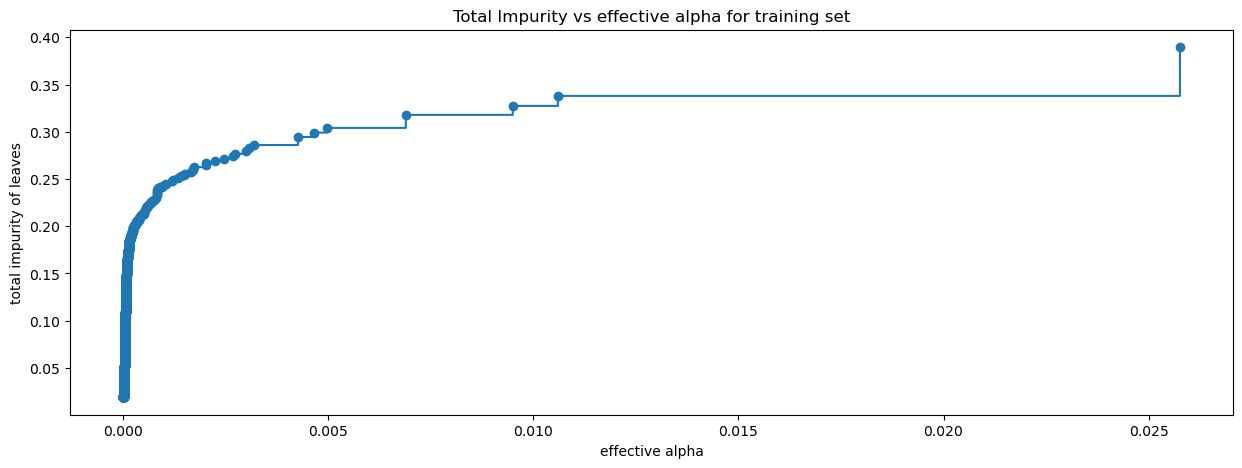

In [344]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [346]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05218215082671268


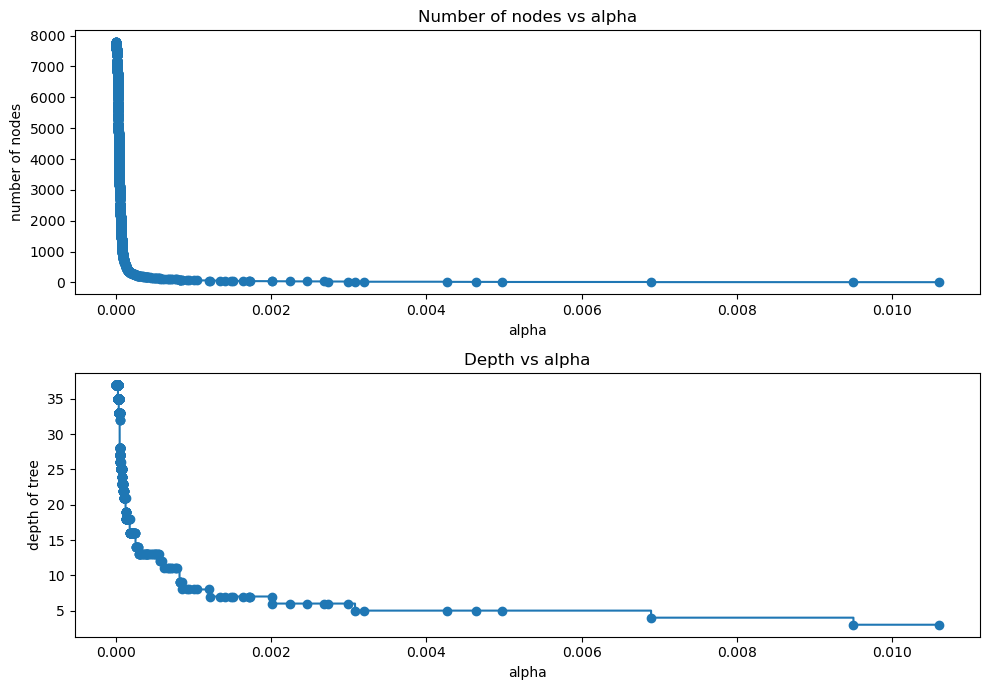

In [351]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [355]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [357]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

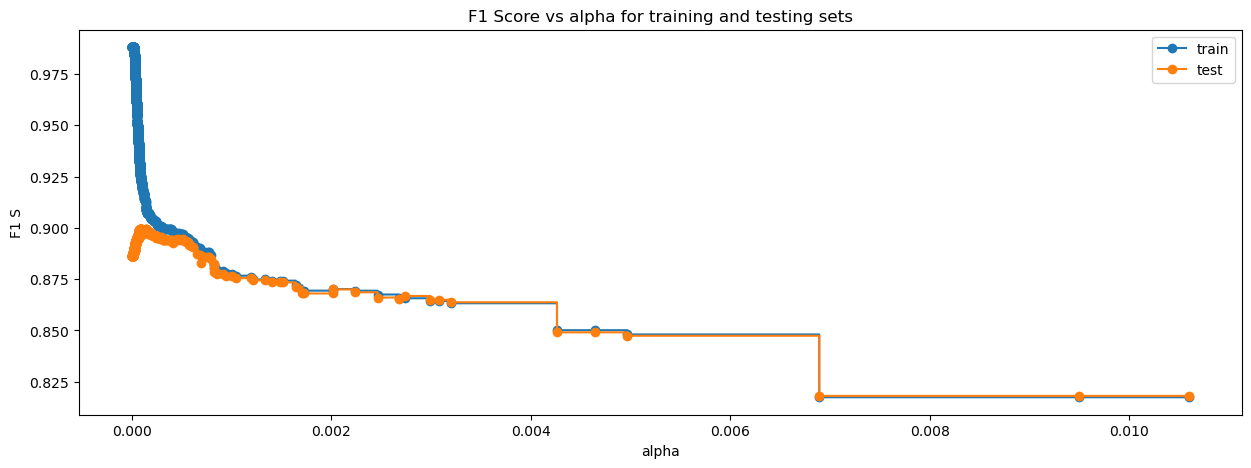

In [358]:
# Plot F1_score & Alpha points to visualize the optimal alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 S")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [361]:
# creating the model where we get highest train and test f1_score
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001355468992976811, random_state=1)


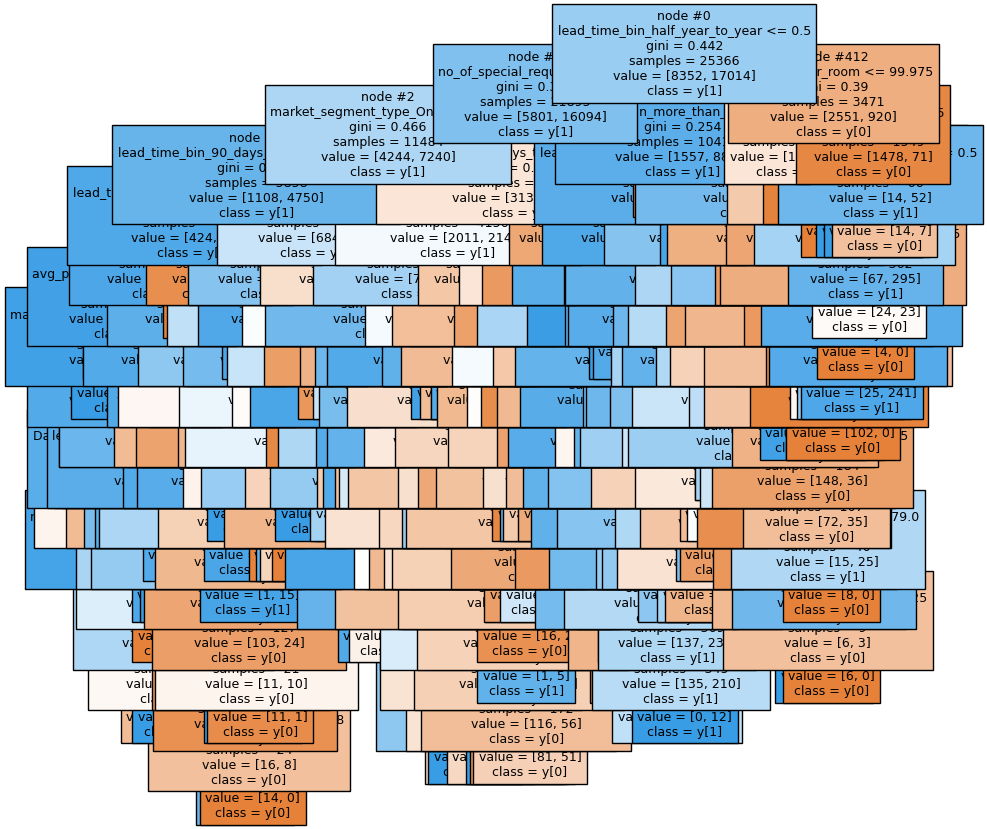

In [367]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

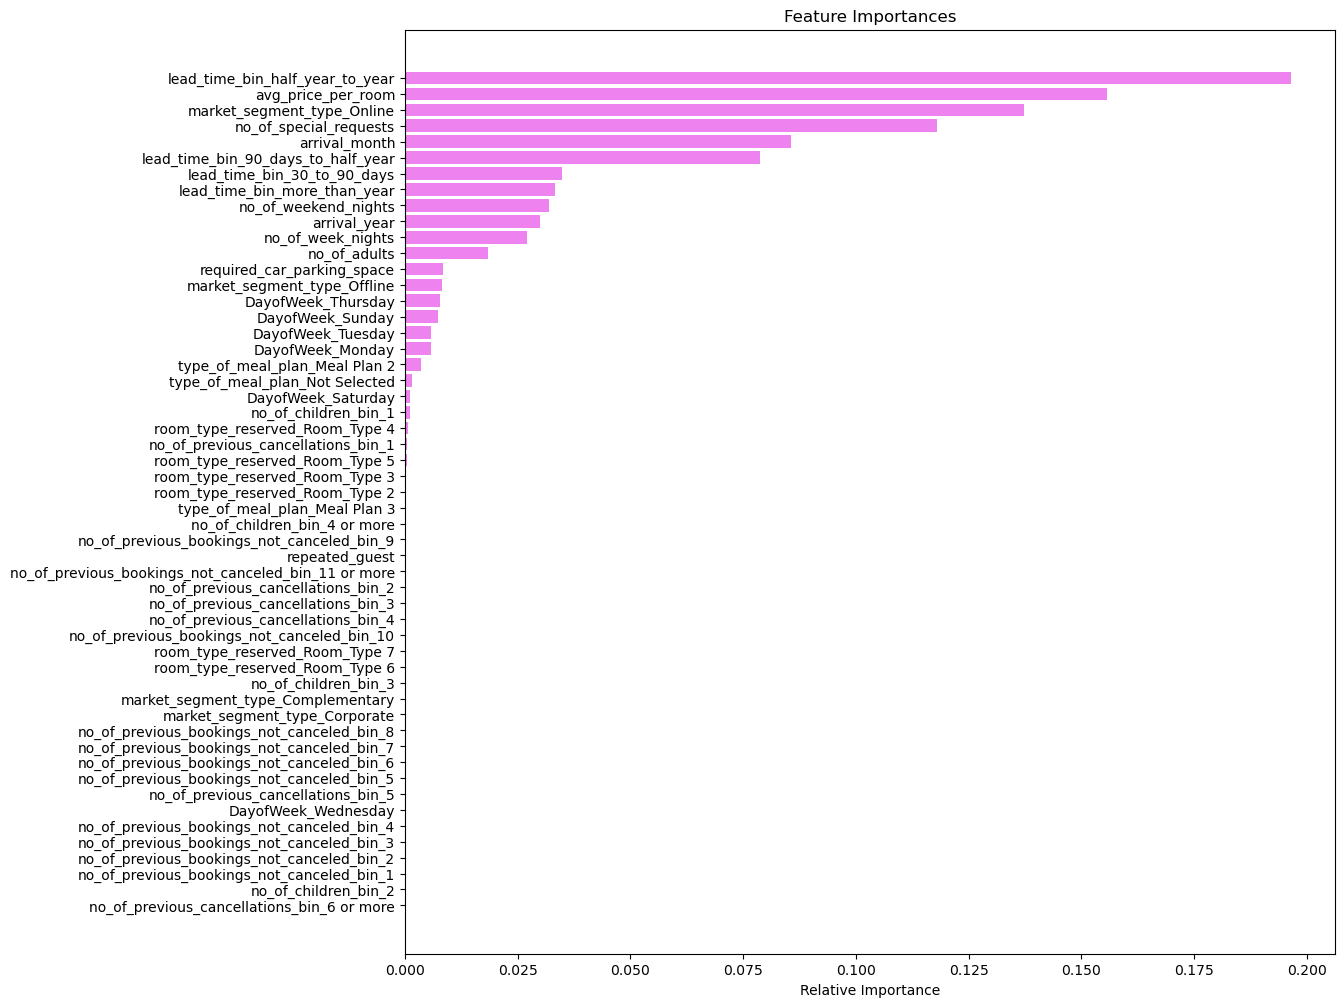

In [368]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

Like the original model, the same features are relatively important but a notice change in order. 6 months to a year lead time has overtaken the average price of the room while online bookings move up by several places.
I can assume that lead times play a big factor in whether a person will cancel their booking

In [377]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [378]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [379]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

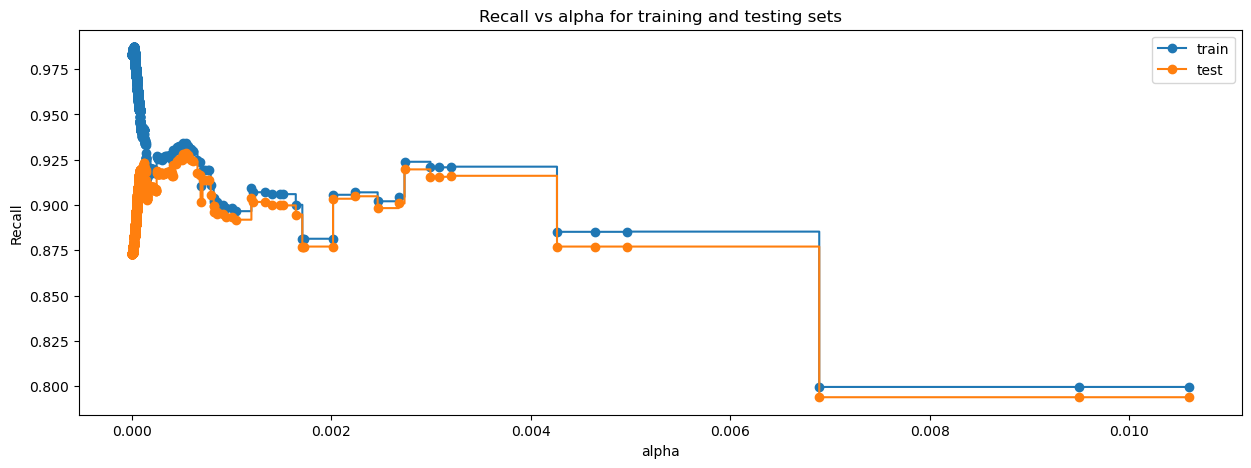

In [380]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [385]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0005386455684601013, random_state=1)


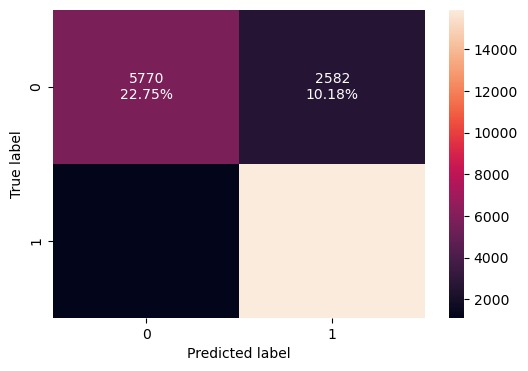

In [387]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [389]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.85406 0.93417    0.86025 0.89569

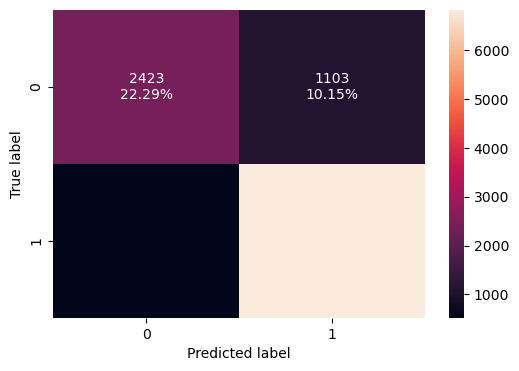

In [391]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [393]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.85026 0.92853    0.86080 0.89339

* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 0.92 which shows that the model is able to generalize well on unseen data.

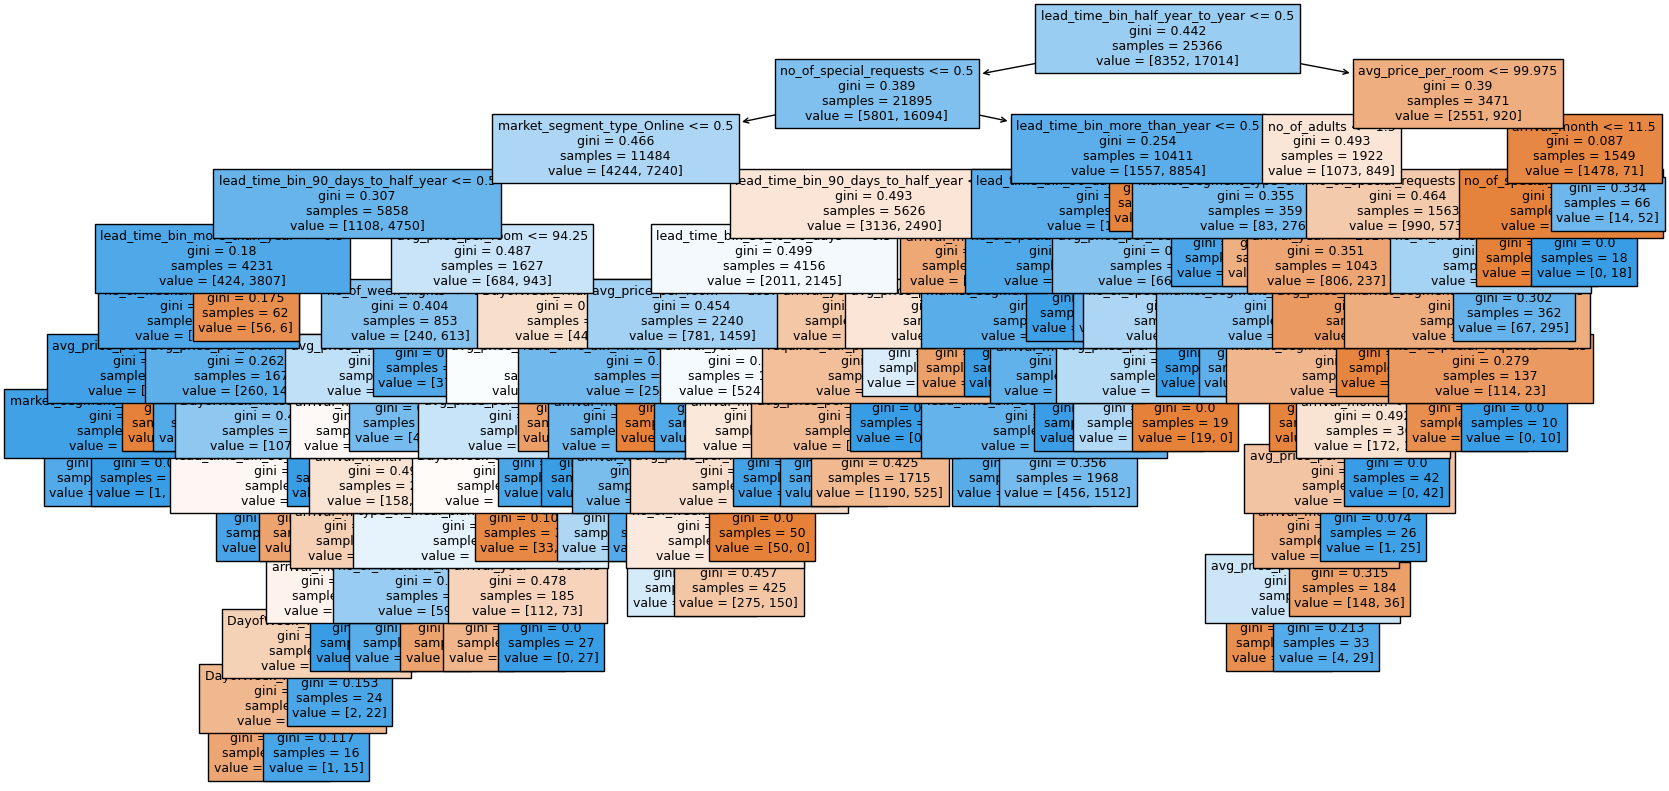

In [397]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [399]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- lead_time_bin_half_year_to_year <= 0.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time_bin_90_days_to_half_year <= 0.50
|   |   |   |   |--- lead_time_bin_more_than_year <= 0.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- avg_price_per_room <= 215.61
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [93.00, 719.00] class: 1
|   |   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |   |--- weights: [1.00, 1663.00] class: 1
|   |   |   |   |   |   |--- avg_price_per_room >  215.61
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |--- avg_price_per_room <= 97.96
|   |   |   |   |   |   |   |--- weights: [153.00, 1169.00] class: 1
|   |   |   |   |   |   |--- avg_price_per_room >  97.

In [401]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

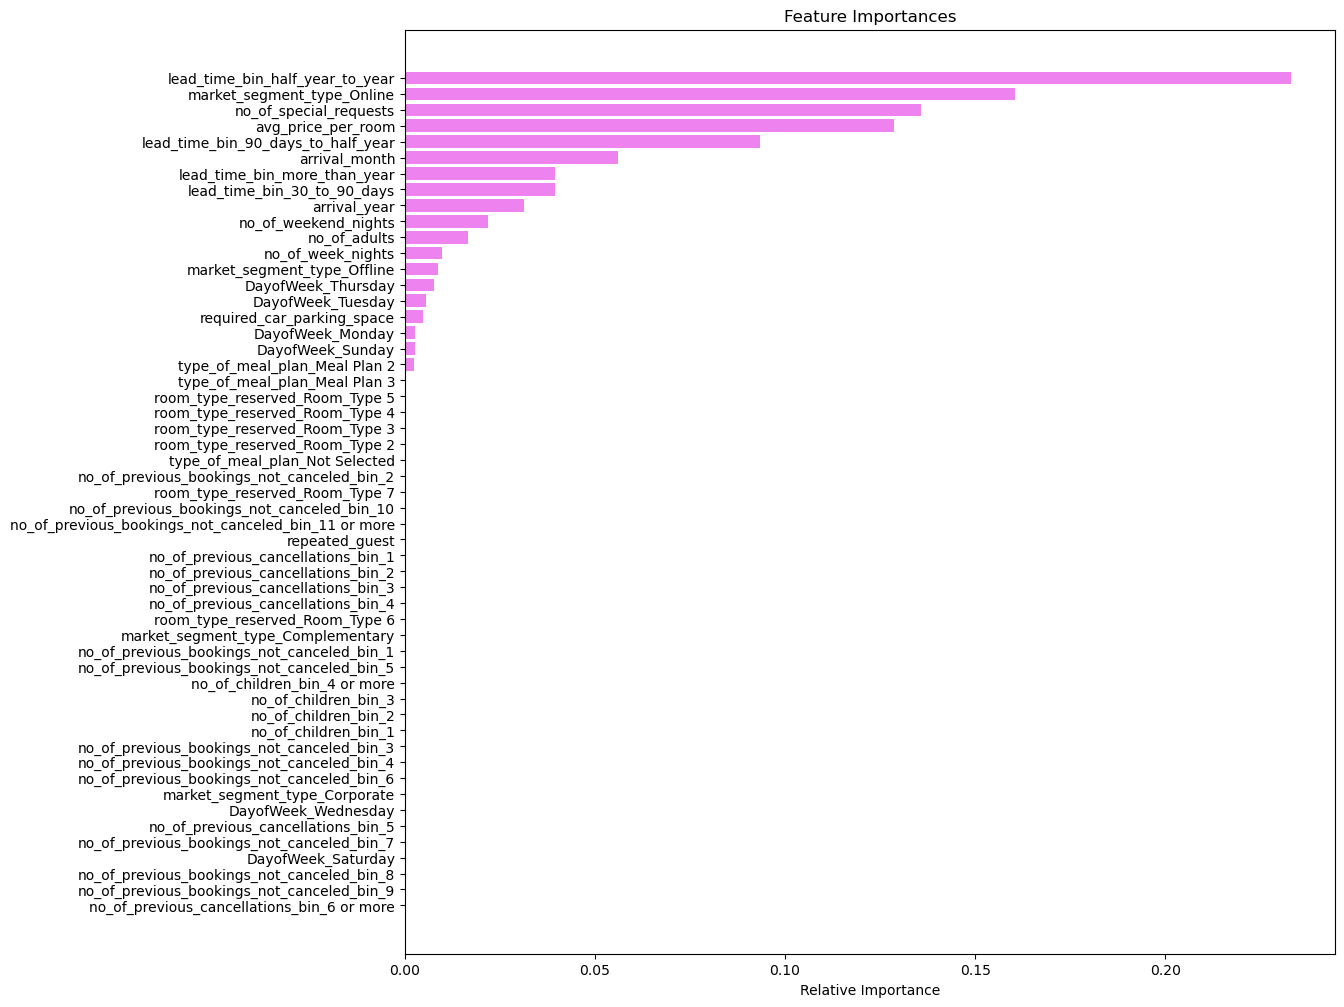

In [403]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [413]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def model_performance_classification_sklearn(model, X, y):
    """
    Evaluate and return performance metrics for a sklearn classification model.

    Parameters:
    model: Trained classification model
    X: Features
    y: Target variable

    Returns:
    A dictionary with model performance metrics.
    """
    # Predict the target variable
    y_pred = model.predict(X)

    # Calculate performance metrics
    performance_metrics = {
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred, average='weighted'),
        'Recall': recall_score(y, y_pred, average='weighted'),
        'F1 Score': f1_score(y, y_pred, average='weighted')
    }
    
    return performance_metrics

# Ensure your models are trained before calling this function
# Example: model.fit(X_train, y_train), estimator.fit(X_train, y_train), etc.

# Uncomment and ensure the models are trained and available in your environment
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(best_model, X_train, y_train)

# Combine the performance metrics
models_train_comp_df = pd.DataFrame({
    'Decision Tree (Initial)': decision_tree_perf_train,
    'Decision Tree (Pre-Pruning)': decision_tree_tune_perf_train,
    'Decision Tree (Post-Pruning)': decision_tree_postpruned_perf_train
})

print("Training performance comparison:")
print(models_train_comp_df)

Training performance comparison:
           Decision Tree (Initial)  Decision Tree (Pre-Pruning)  \
Accuracy                   0.98403                      0.89620   
Precision                  0.98423                      0.89547   
Recall                     0.98403                      0.89620   
F1 Score                   0.98408                      0.89569   

           Decision Tree (Post-Pruning)  
Accuracy                        0.85406  
Precision                       0.85274  
Recall                          0.85406  
F1 Score                        0.85006  


In [419]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def model_performance_classification_sklearn(model, X, y):
    """
    Evaluate and return performance metrics for a sklearn classification model.

    Parameters:
    model: Trained classification model
    X: Features
    y: Target variable

    Returns:
    A dictionary with model performance metrics.
    """
    # Predict the target variable
    y_pred = model.predict(X)

    # Calculate performance metrics
    performance_metrics = {
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred, average='weighted'),
        'Recall': recall_score(y, y_pred, average='weighted'),
        'F1 Score': f1_score(y, y_pred, average='weighted')
    }
    
    return performance_metrics


# Assuming `model`, `estimator`, and `best_model` are trained models
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(best_model, X_test, y_test)

# Combine the performance metrics
models_test_comp_df = pd.DataFrame({
    'Decision Tree (Initial)': decision_tree_perf_test,
    'Decision Tree (Pre-Pruning)': decision_tree_tune_perf_test,
    'Decision Tree (Post-Pruning)': decision_tree_postpruned_perf_test
})

print("Testing performance comparison:")
print(models_test_comp_df)

Testing performance comparison:
           Decision Tree (Initial)  Decision Tree (Pre-Pruning)  \
Accuracy                   0.84842                      0.85688   
Precision                  0.85144                      0.85603   
Recall                     0.84842                      0.85688   
F1 Score                   0.84956                      0.85639   

           Decision Tree (Post-Pruning)  
Accuracy                        0.85026  
Precision                       0.84819  
Recall                          0.85026  
F1 Score                        0.84641  


**Observation:**

The post-pruning model, also known as model "best_model" shows the highest F1 score for testing data. I would use this model for future predictions.
Recommendations:

Knowing that lead time, price, and online bookings have the highest influence on cancellations we can infer that having cancellation clause during the online booking process would influence how customer's 

book.
Keep price of rooms near competitive pricing as it seems like guest will be book a room with the expectation of continued searches.
Since repeating_guests have a very low cancellation rate, creating a loyalty program for those guest would help incentives other to move into that ca

tegory.
During the online booking process, offering addtional customizations or special request would help reduce the likelihood of a cancelled booking.